# 02c - Preprocess the `development` dataset - Outliers detection

__Goal__: Detect and save the dictionary of the  outliers of the numerical variables of the `development` dataset.

1. Read the `development` dataset `weather_dataset_raw_development_columns.pkl`;
2. Detect the outliers of the numerical variables using visualizations as:
    - Histograms or KDE plots
    - Box plots or boxen plots
    - Plots (per year of data)
4. Detect the outliers of the numerical variables using the Tukey method;
5. Save the dictionary of the outlier series of the numerical variables as `outlier_series_dict.pkl`.

### Import

In [1]:
import os

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
artifacts_dir = Path('../artifacts')
artifacts_dir.mkdir(exist_ok=True)
data_dir = Path('../data')

### Utilities

In [3]:
def display_histograms_of_numerical_variables(df, numerical_variables):
    plt.rcParams["figure.figsize"] = (12, 4)
    for variable in numerical_variables:
        print(f'Histogram of "{variable}":')
        print("-"*len(f'Histogram of "{variable}":')+"\n")
        sns.histplot(df[variable]);
        plt.show()

In [4]:
def display_KDE_plots_of_numerical_variables(df, numerical_variables):
    plt.rcParams["figure.figsize"] = (12, 4)
    for variable in numerical_variables:
        print(f'KDE plot of "{variable}":')
        print("-"*len(f'KDE plot of "{variable}":')+"\n")
        sns.kdeplot(df[variable]);
        plt.show()

In [5]:
def display_box_plots_of_numerical_variables(df, numerical_variables):
    plt.rcParams["figure.figsize"] = (12, 4)
    for variable in numerical_variables:
        print(f'Box plot of "{variable}":')
        print("-"*len(f'Box plot of "{variable}":')+"\n")
        sns.boxplot(df[variable]);
        plt.show()

In [6]:
def display_boxen_plots_of_numerical_variables(df, numerical_variables):
    plt.rcParams["figure.figsize"] = (12, 4)
    for variable in numerical_variables:
        print(f'Boxen plot of "{variable}":')
        print("-"*len(f'Boxen plot of "{variable}":')+"\n")
        sns.boxenplot(df[variable], orient="h");
        plt.show()

In [7]:
def plot_series(df, column_name, min_datetime=None, max_datetime=None,  figsize=(20,6)):
    if min_datetime:
        min_ts = pd.Timestamp(min_datetime, tz="UTC") 
    else: 
        min_ts = None
    if max_datetime:
        max_ts = pd.Timestamp(max_datetime, tz="UTC") 
    else:
        max_ts = None
    plt.figure(figsize=figsize)
    df.loc[min_ts: max_ts][column_name].plot()

def dispay_plots_of_numerical_variables_per_year(df, numerical_variables):
    years = [str(year) for year in range(df.index.min().year, df.index.max().year+2)]
    for variable in numerical_variables:
        print(f'\nVariable "{variable}":')
        print("-"*len(f'Variable "{variable}":')+"\n")
        for year1, year2 in zip(years[:-1], years[1:]):
            print(f'Variable \"{variable}\", year {year1}:')
            plot_series(df, variable, min_datetime=year1, max_datetime=year2,  figsize=(18,6))
            plt.show()

In [8]:
def iqr_outliers(data, whis=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (whis * IQR)
    upper_fence = q3 + (whis* IQR)
    outliers_series = data[(data > upper_fence) | (data < lower_fence)]
    return outliers_series

In [9]:
def detect_the_outliers_of_numerical_variables_using_Tukey_method(df, numerical_variables, whis=1.5):
    whis=2
    outlier_series_dict = {}
    for variable in numerical_variables:
        outlier_series_dict[variable] = iqr_outliers(df[variable], whis=whis)
    return outlier_series_dict

In [10]:
def detect_the_outliers_of_numerical_variables_using_Tukey_method(df, numerical_variables, whis=1.5):
    whis=2
    outlier_series_dict = {}
    for variable in numerical_variables:
        outlier_series_dict[variable] = iqr_outliers(df[variable], whis=whis)
    return outlier_series_dict

In [11]:
def display_outlier_series(outlier_series_dict):
    for variable_name in outlier_series_dict.keys():
        print(f'Timestamps of the outliers of "{variable_name}":')
        print("="*len(f'Timestamps of the outliers of "{variable_name}":')+"\n")
        print(outlier_series_dict[variable_name], "\n")   

# 1. Read  the  dataset

In [12]:
df = pd.read_pickle(data_dir/'weather_dataset_raw_development_columns.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2006-01-01 00:00:00+00:00 to 2010-12-31 23:00:00+00:00
Freq: H
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   43824 non-null  float64
 1   Humidity      43824 non-null  float64
 2   Wind_speed    43824 non-null  float64
 3   Wind_bearing  43824 non-null  int64  
 4   Visibility    43824 non-null  float64
 5   Pressure      43824 non-null  float64
 6   Weather       43819 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.7 MB


In [13]:
df.head()

Temperature  Humidity  Wind_speed  Wind_bearing  \
2006-01-01 00:00:00+00:00     1.161111      0.85     16.6152           139   
2006-01-01 01:00:00+00:00     1.666667      0.82     20.2538           140   
2006-01-01 02:00:00+00:00     1.711111      0.82     14.4900           140   
2006-01-01 03:00:00+00:00     1.183333      0.86     13.9426           134   
2006-01-01 04:00:00+00:00     1.205556      0.85     15.9068           149   

                           Visibility  Pressure  Weather  
2006-01-01 00:00:00+00:00      9.9015   1016.15      0.0  
2006-01-01 01:00:00+00:00      9.9015   1015.87      0.0  
2006-01-01 02:00:00+00:00      9.9015   1015.56      0.0  
2006-01-01 03:00:00+00:00      9.9015   1014.98      0.0  
2006-01-01 04:00:00+00:00      9.9820   1014.08      0.0

In [14]:
df.tail()

Temperature  Humidity  Wind_speed  Wind_bearing  \
2010-12-31 19:00:00+00:00    -7.222222      0.96      0.1449           230   
2010-12-31 20:00:00+00:00    -7.200000      0.96      3.1717           258   
2010-12-31 21:00:00+00:00    -7.244444      0.96      3.3327           311   
2010-12-31 22:00:00+00:00    -7.127778      0.96      3.0751           260   
2010-12-31 23:00:00+00:00    -7.105556      0.96      3.2039           249   

                           Visibility  Pressure  Weather  
2010-12-31 19:00:00+00:00      3.4293   1025.43      1.0  
2010-12-31 20:00:00+00:00      3.4293   1025.57      1.0  
2010-12-31 21:00:00+00:00      4.2504   1025.36      1.0  
2010-12-31 22:00:00+00:00      3.8801   1025.59      1.0  
2010-12-31 23:00:00+00:00      3.4132   1025.47      1.0

# 2. Detect the outliers of the numerical variables using visualizations

## A) Select the numerical variables

In [15]:
numerical_variables = list(df.columns)
numerical_variables.remove("Weather")
print("List of the numerical variables:", ', '.join(numerical_variables))

List of the numerical variables: Temperature, Humidity, Wind_speed, Wind_bearing, Visibility, Pressure


## B.1) Histograms

Histogram of "Temperature":
---------------------------



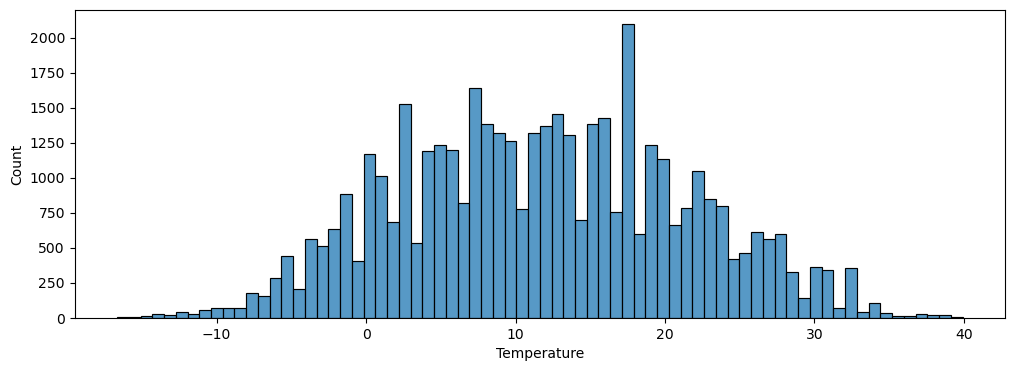

Histogram of "Humidity":
------------------------



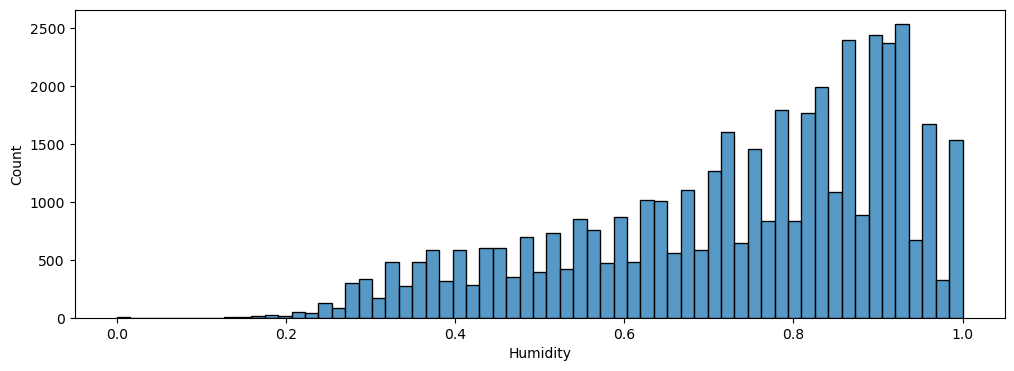

Histogram of "Wind_speed":
--------------------------



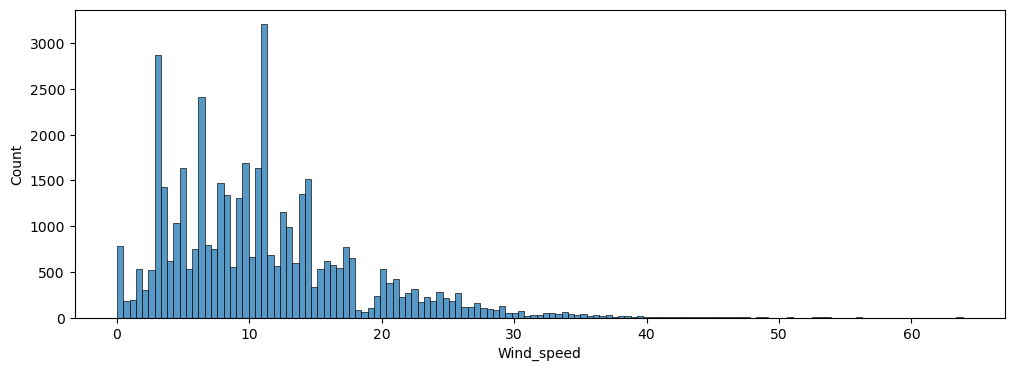

Histogram of "Wind_bearing":
----------------------------



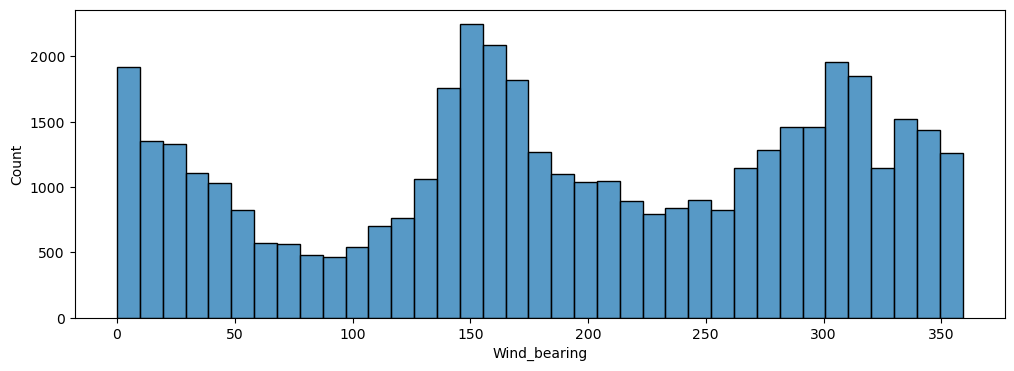

Histogram of "Visibility":
--------------------------



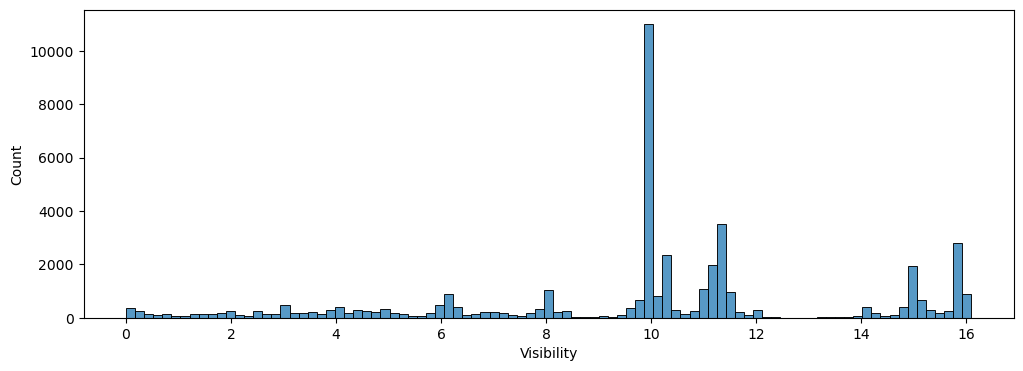

Histogram of "Pressure":
------------------------



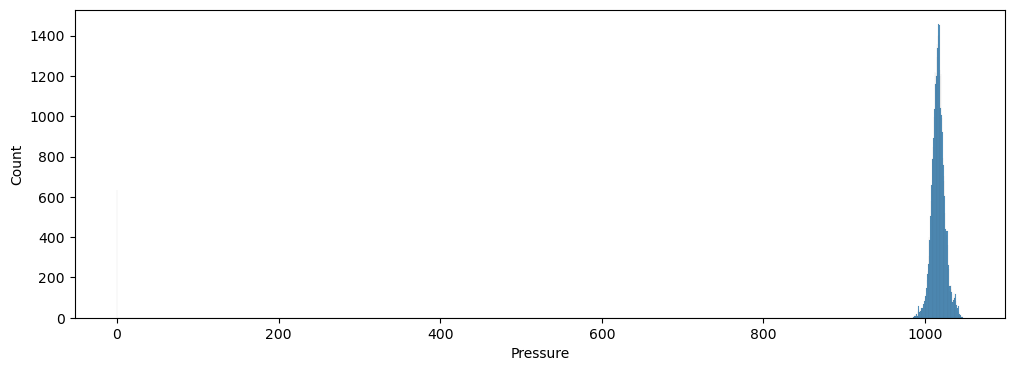

In [16]:
display_histograms_of_numerical_variables(df, numerical_variables)

## B.2) KDE plots

KDE plot of "Temperature":
--------------------------



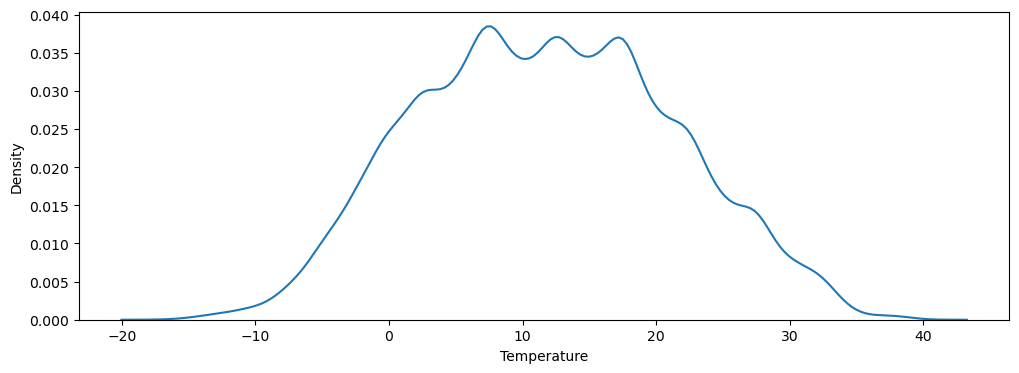

KDE plot of "Humidity":
-----------------------



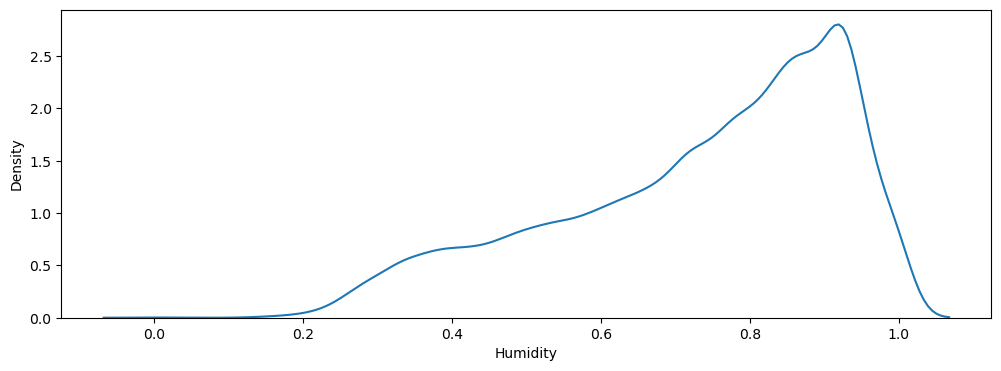

KDE plot of "Wind_speed":
-------------------------



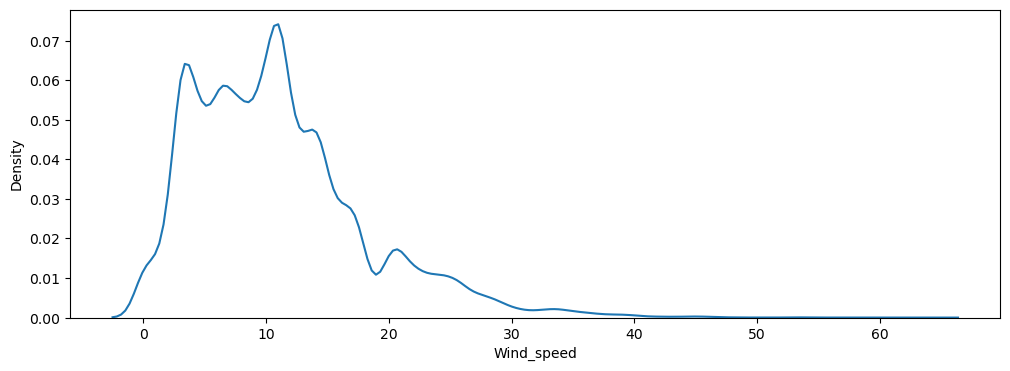

KDE plot of "Wind_bearing":
---------------------------



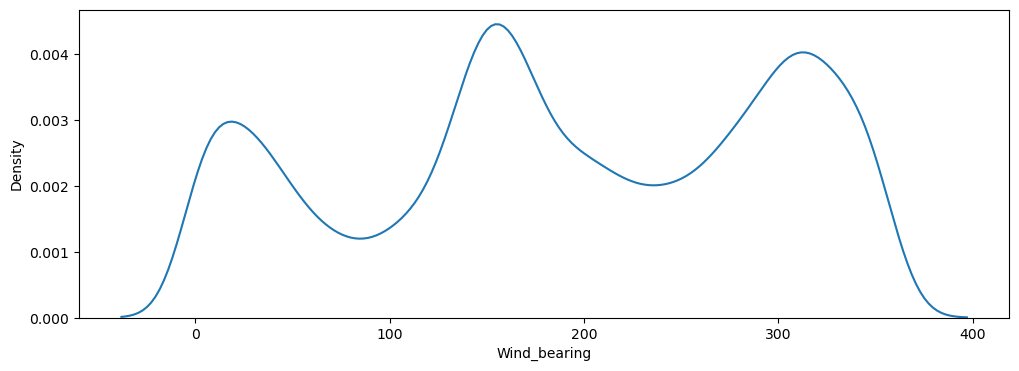

KDE plot of "Visibility":
-------------------------



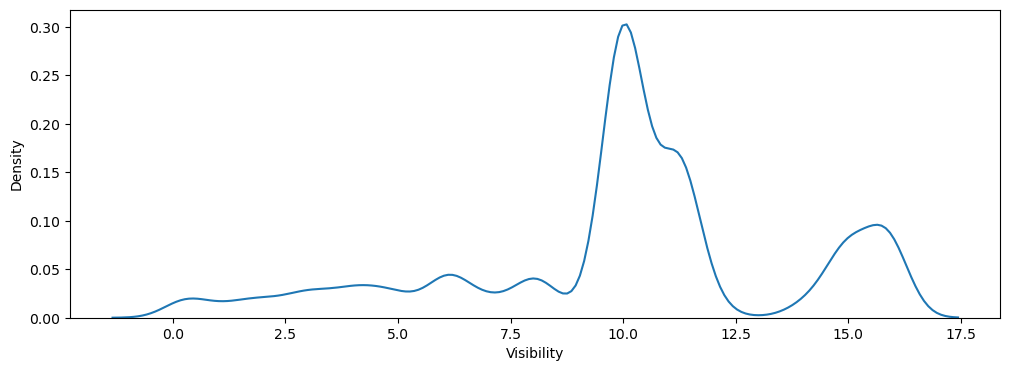

KDE plot of "Pressure":
-----------------------



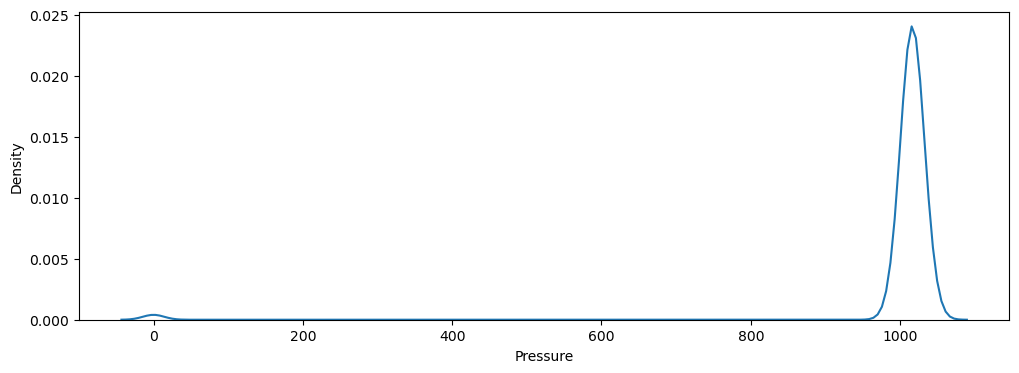

In [17]:
display_KDE_plots_of_numerical_variables(df, numerical_variables)

## C.1) Box plots

Box plot of "Temperature":
--------------------------



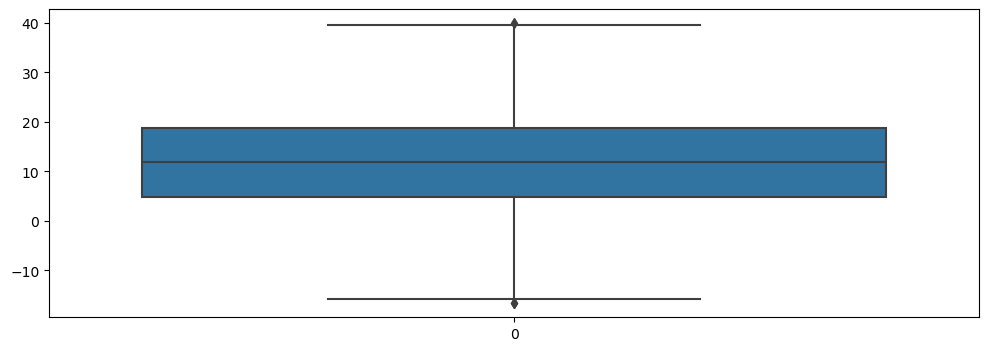

Box plot of "Humidity":
-----------------------



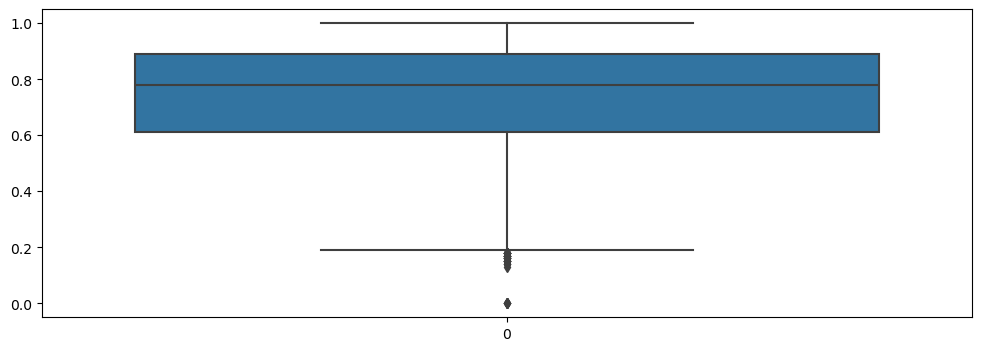

Box plot of "Wind_speed":
-------------------------



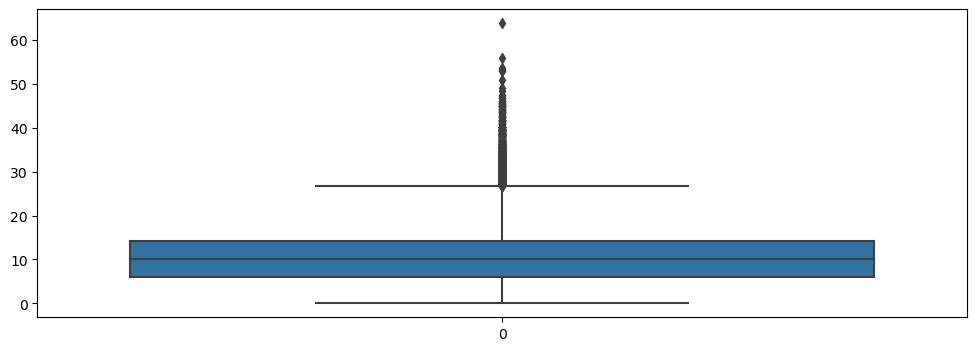

Box plot of "Wind_bearing":
---------------------------



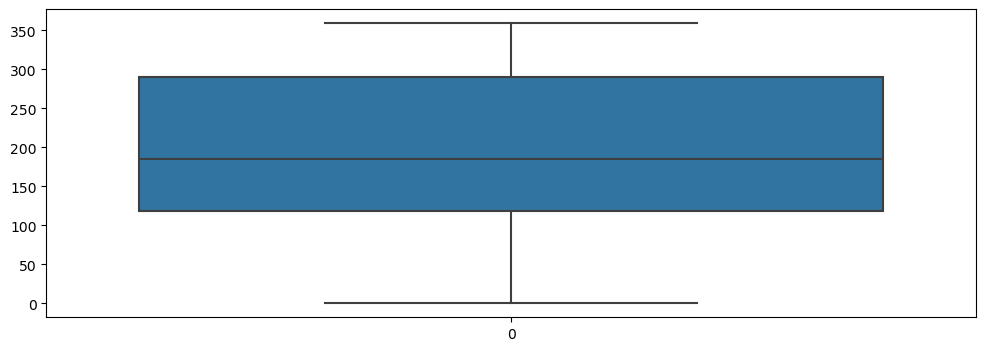

Box plot of "Visibility":
-------------------------



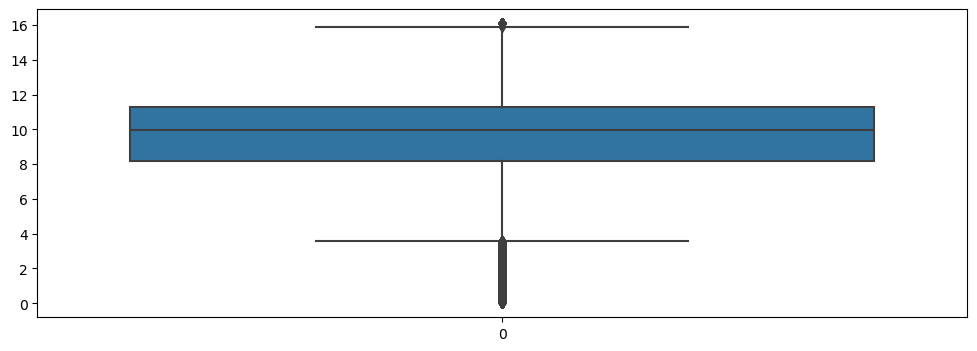

Box plot of "Pressure":
-----------------------



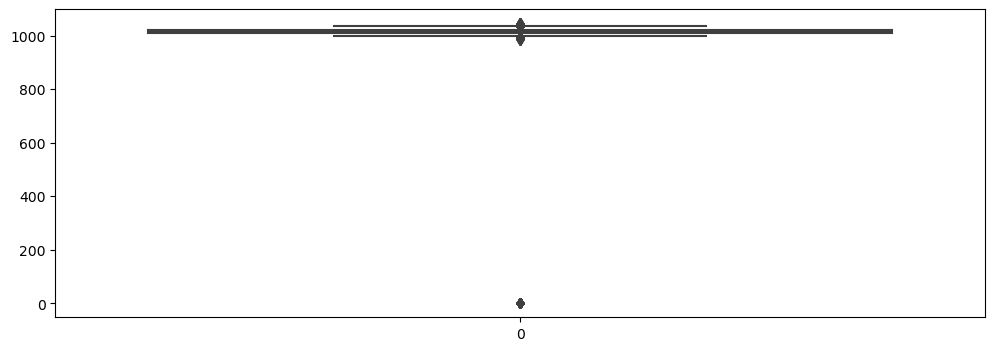

In [18]:
display_box_plots_of_numerical_variables(df, numerical_variables)

## C.2) Boxen plots

Boxen plot of "Temperature":
----------------------------



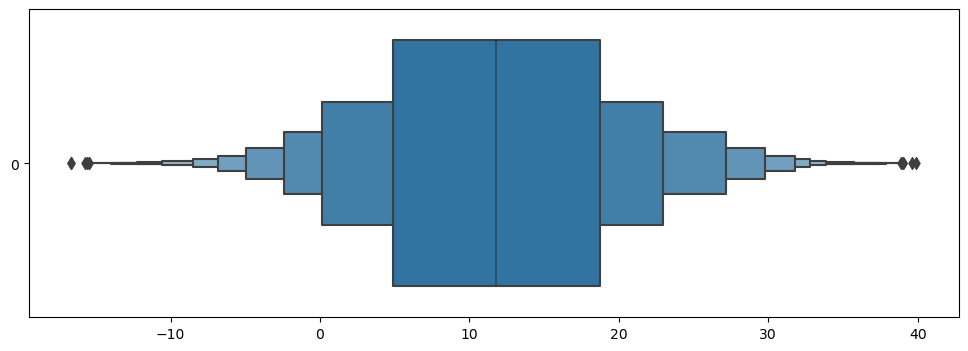

Boxen plot of "Humidity":
-------------------------



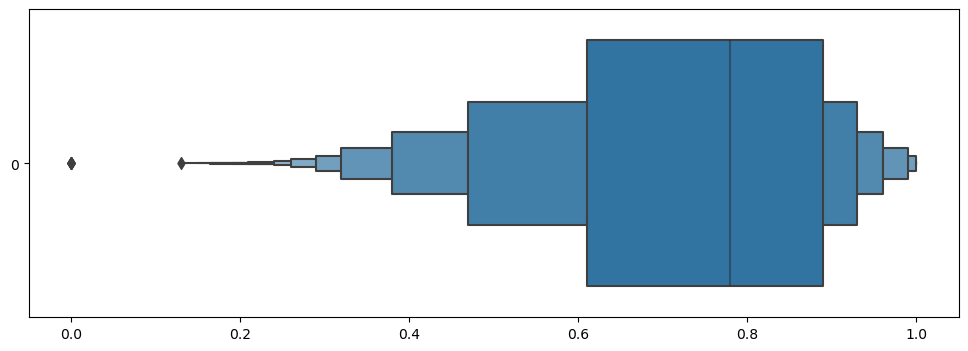

Boxen plot of "Wind_speed":
---------------------------



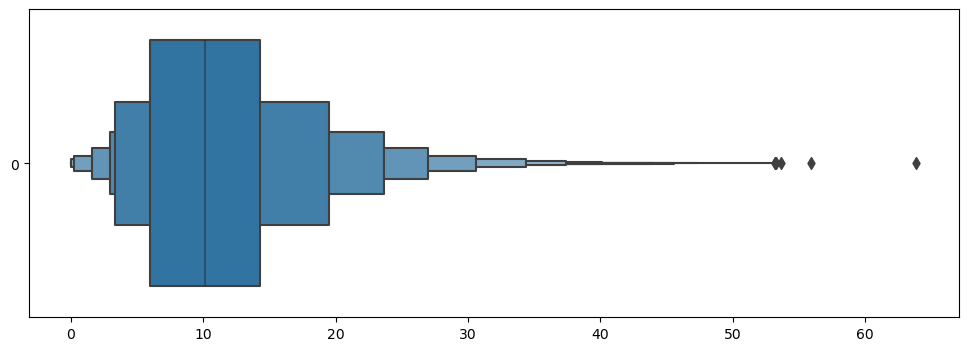

Boxen plot of "Wind_bearing":
-----------------------------



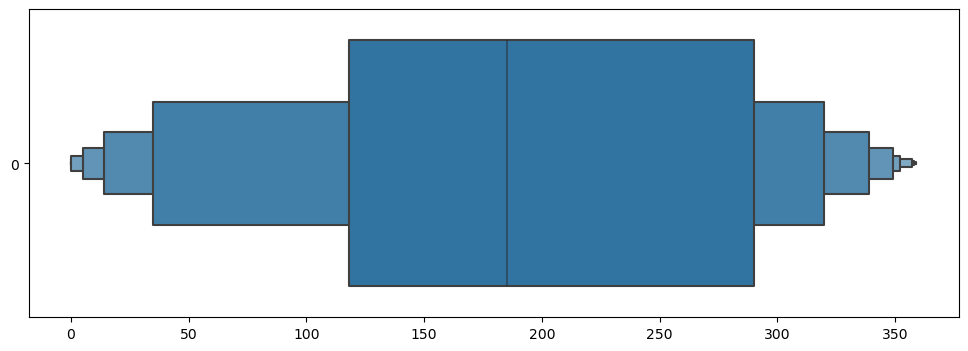

Boxen plot of "Visibility":
---------------------------



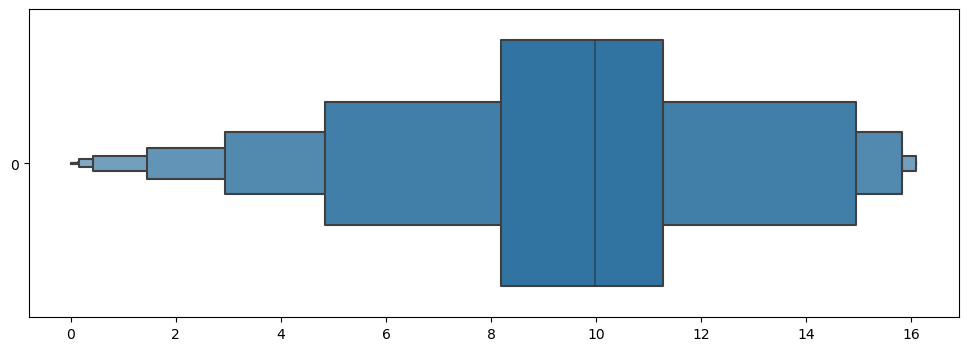

Boxen plot of "Pressure":
-------------------------



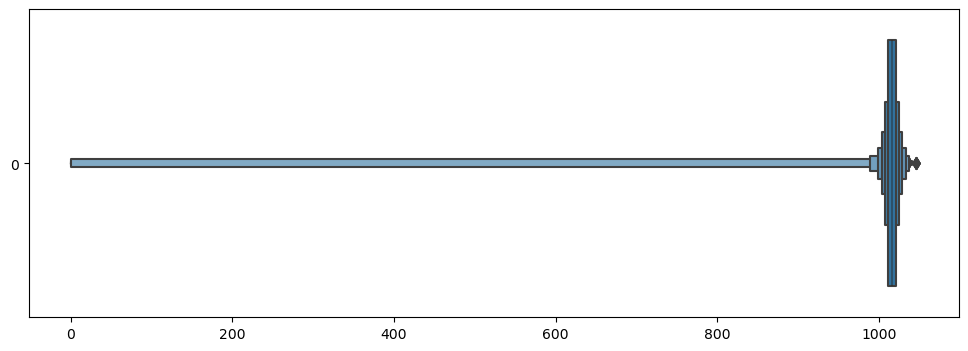

In [19]:
display_boxen_plots_of_numerical_variables(df, numerical_variables)

## D) Plots (per year of data)


Variable "Temperature":
-----------------------

Variable "Temperature", year 2006:


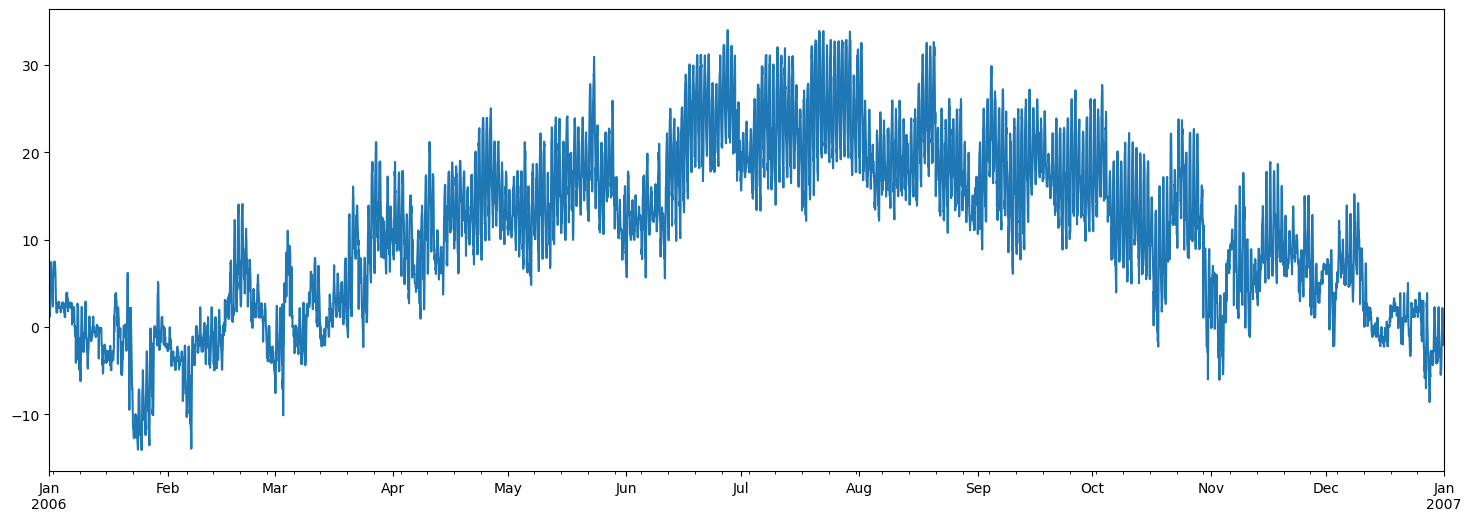

Variable "Temperature", year 2007:


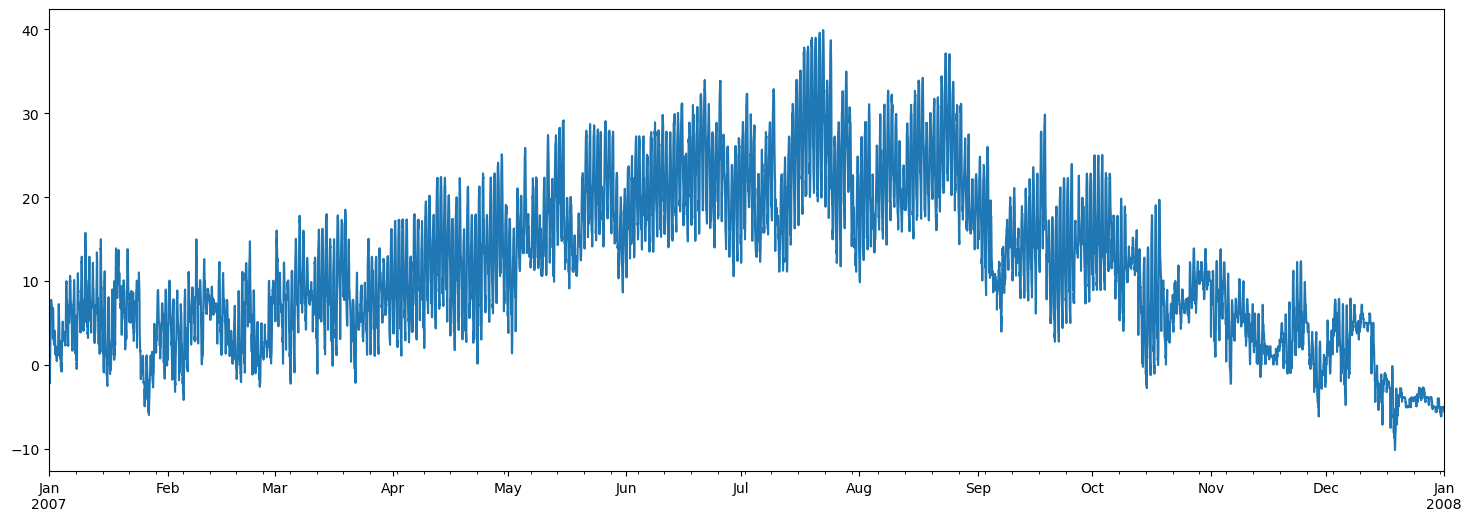

Variable "Temperature", year 2008:


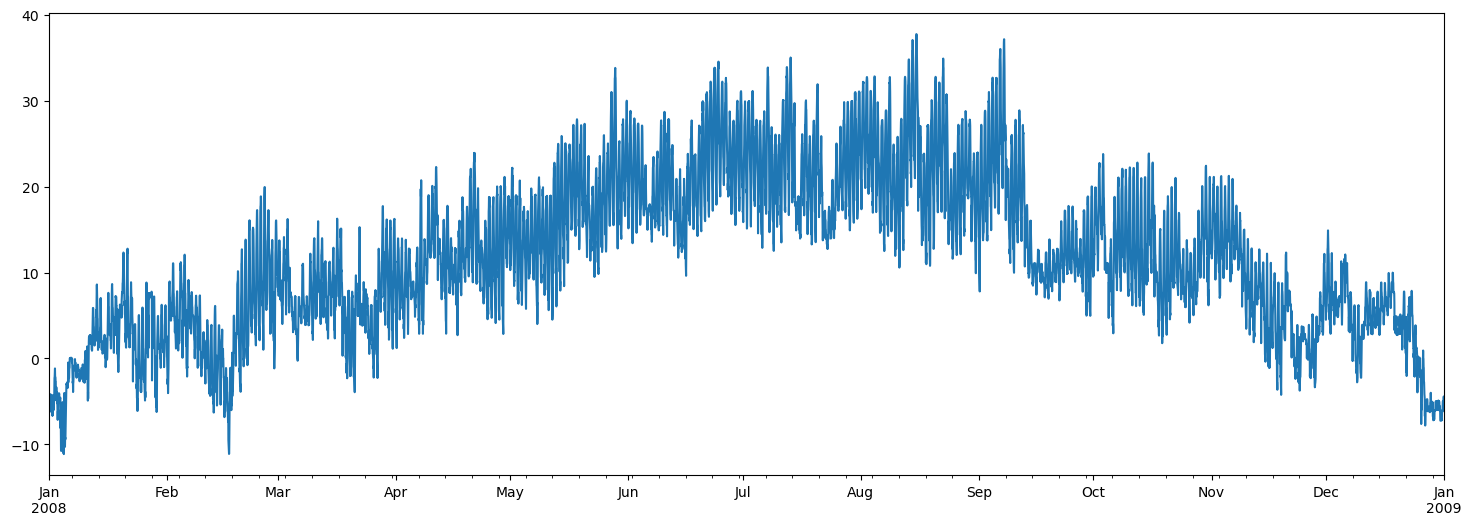

Variable "Temperature", year 2009:


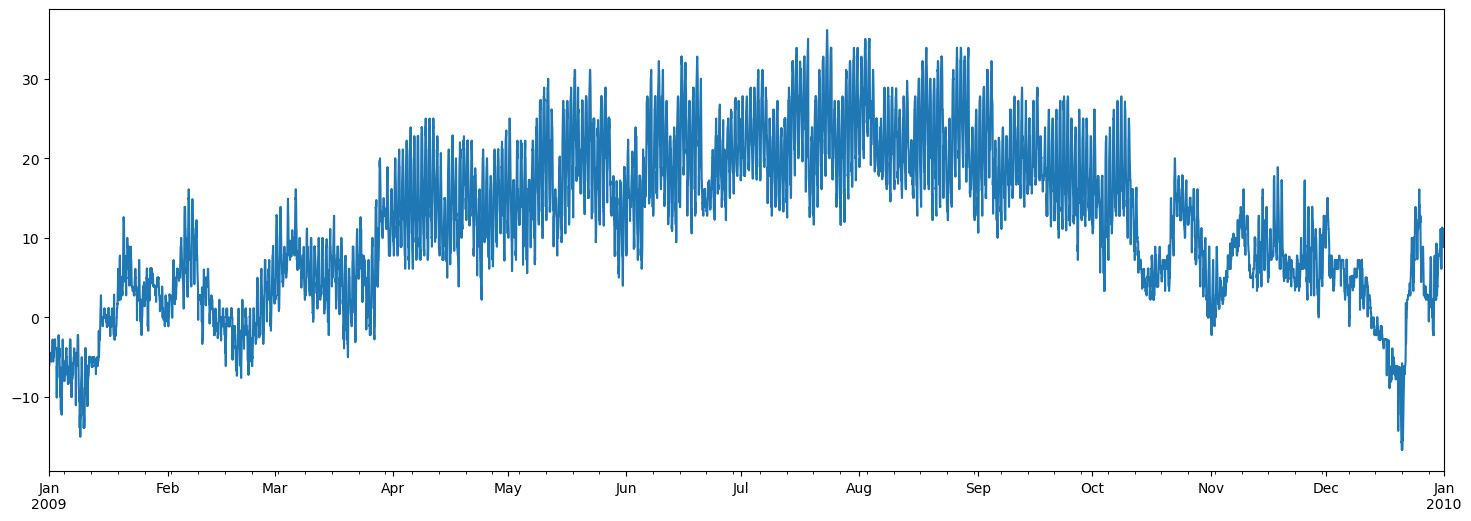

Variable "Temperature", year 2010:


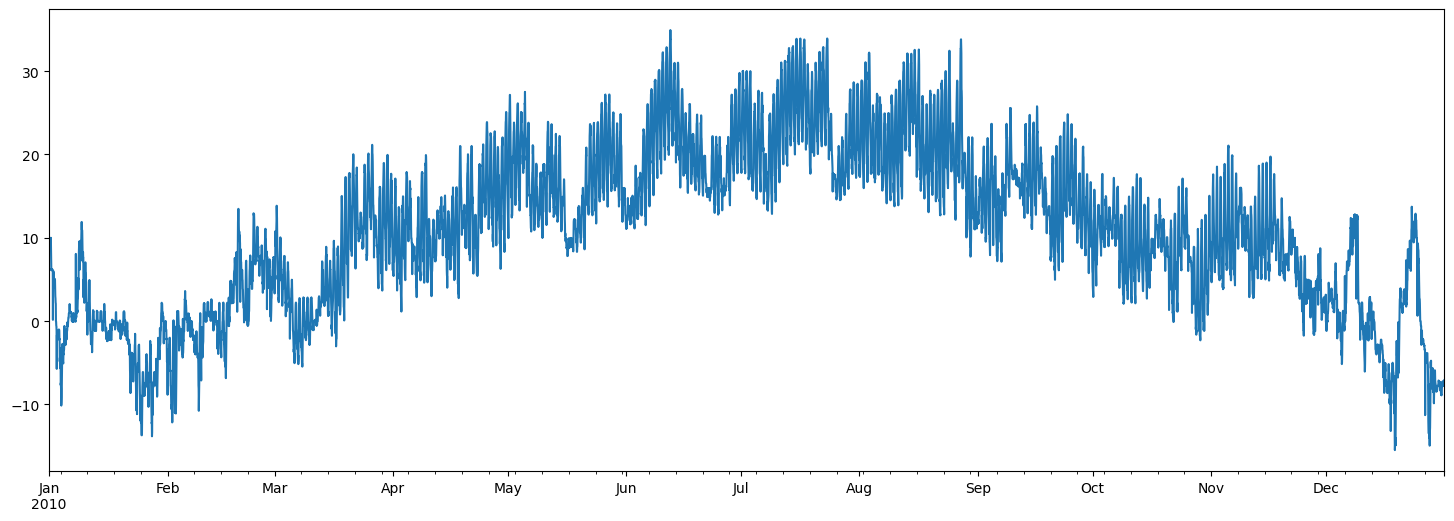


Variable "Humidity":
--------------------

Variable "Humidity", year 2006:


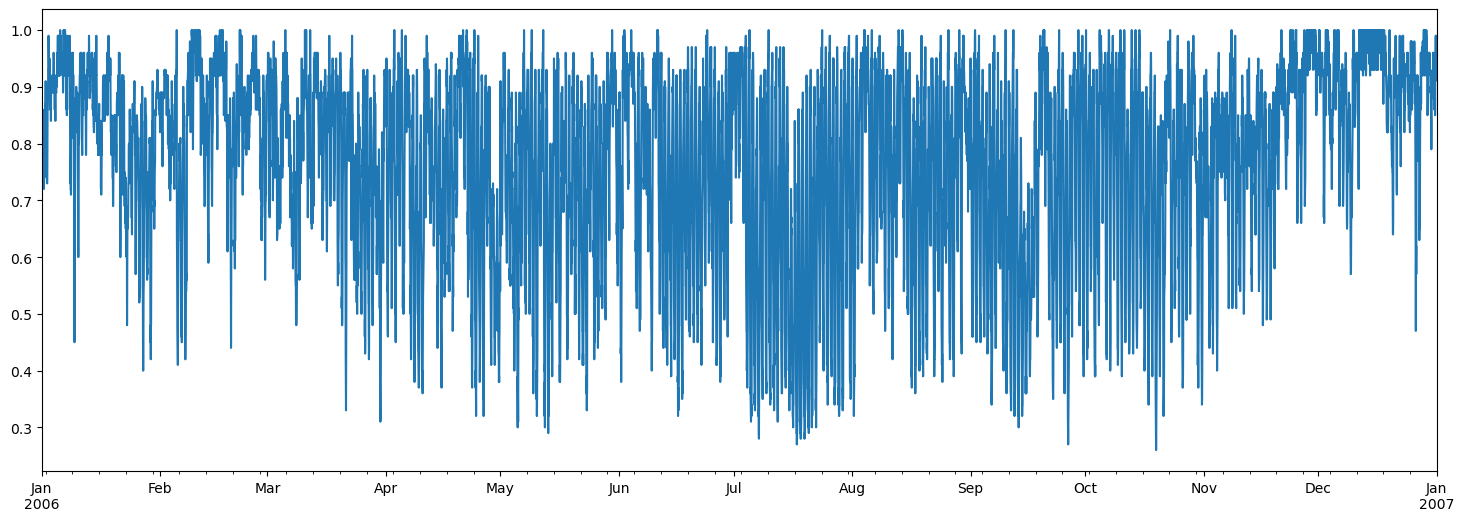

Variable "Humidity", year 2007:


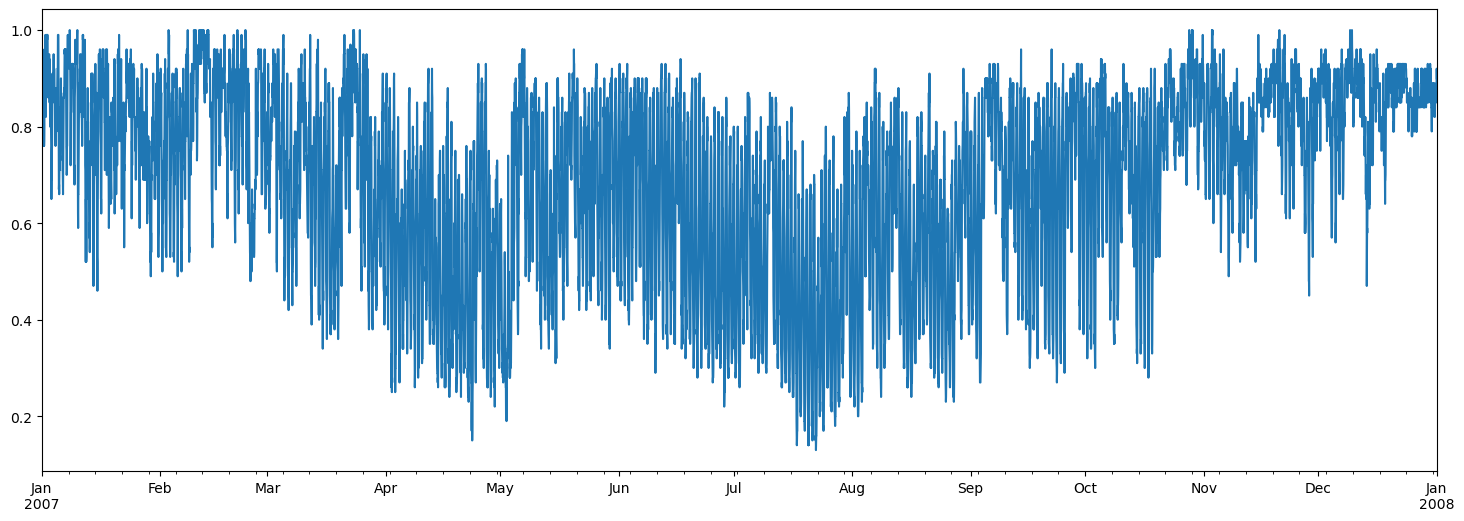

Variable "Humidity", year 2008:


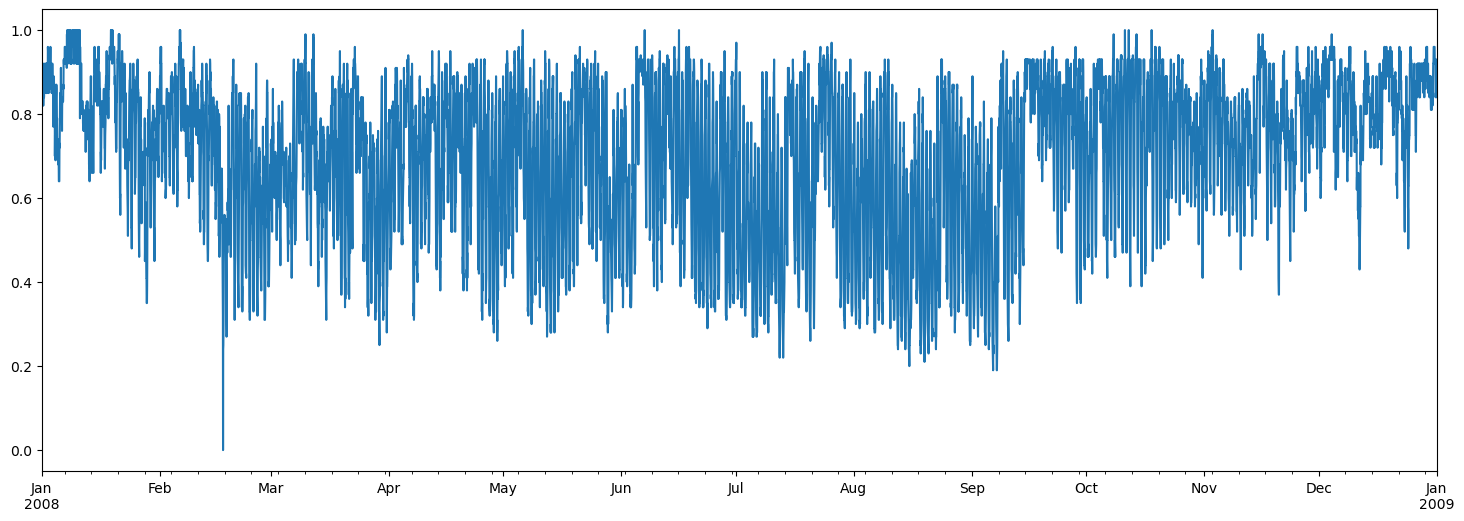

Variable "Humidity", year 2009:


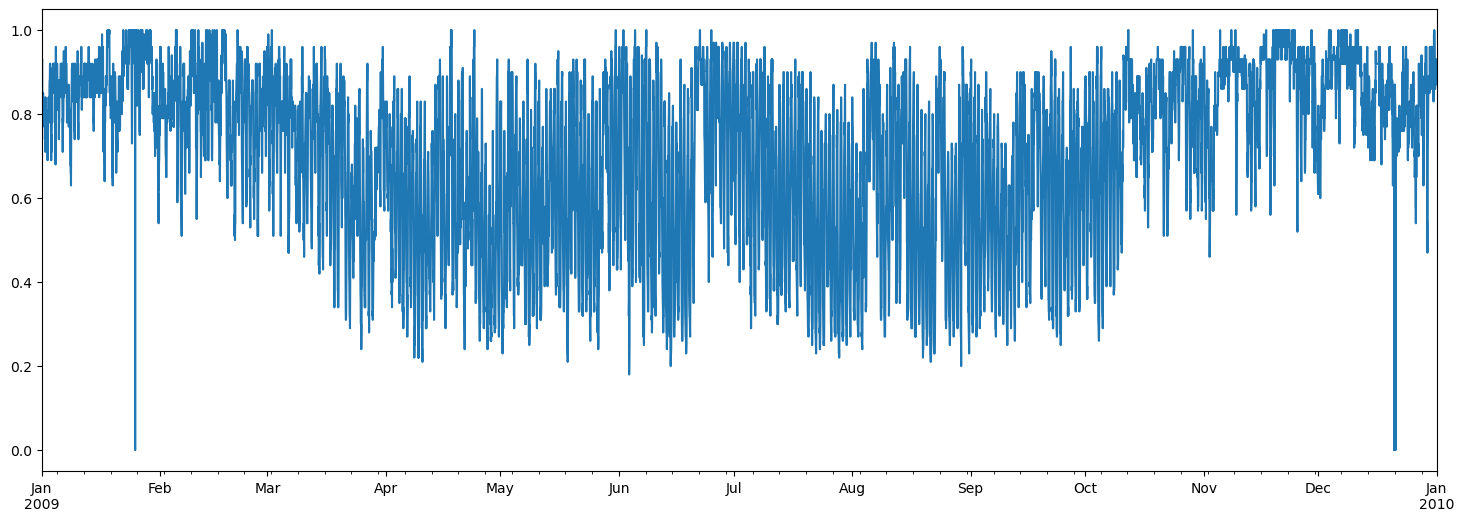

Variable "Humidity", year 2010:


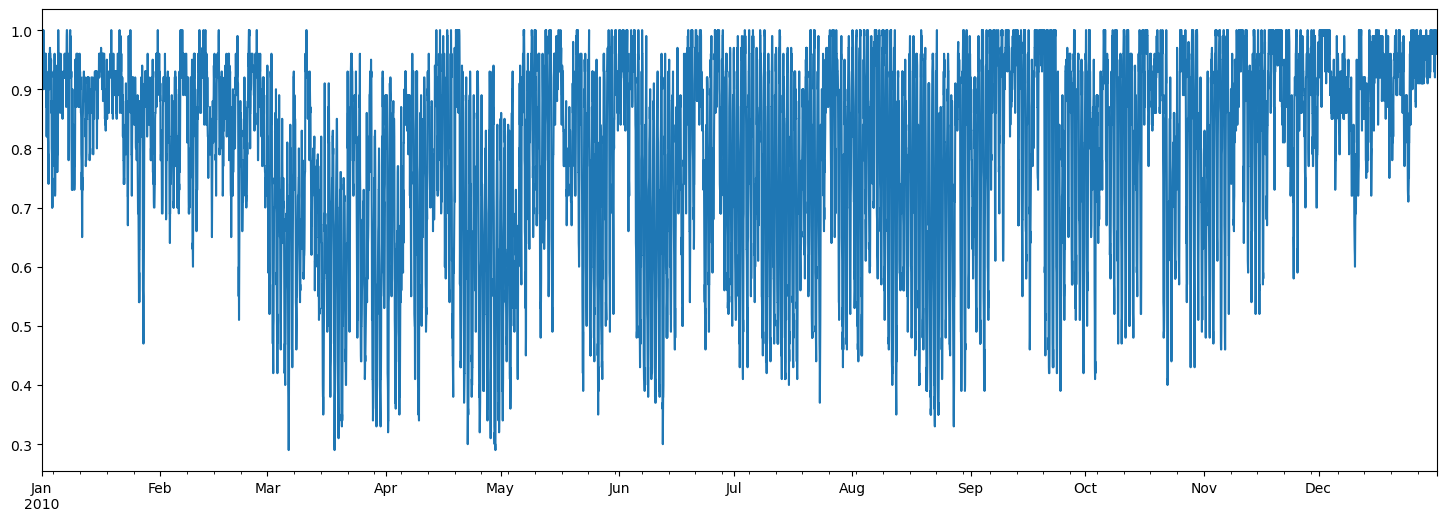


Variable "Wind_speed":
----------------------

Variable "Wind_speed", year 2006:


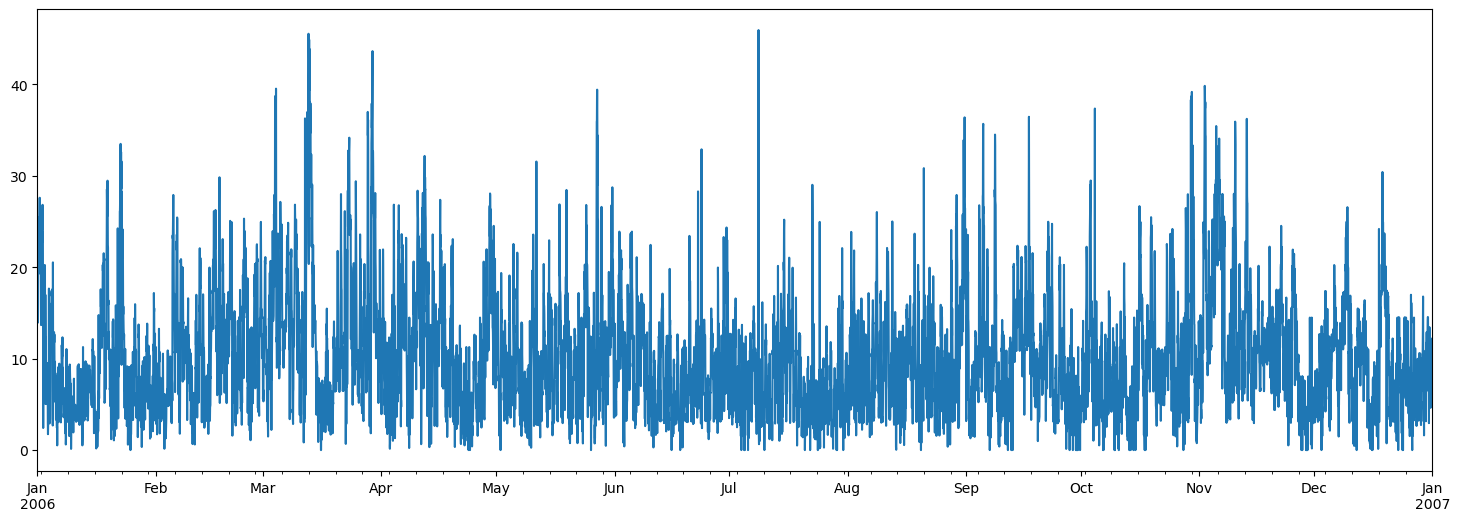

Variable "Wind_speed", year 2007:


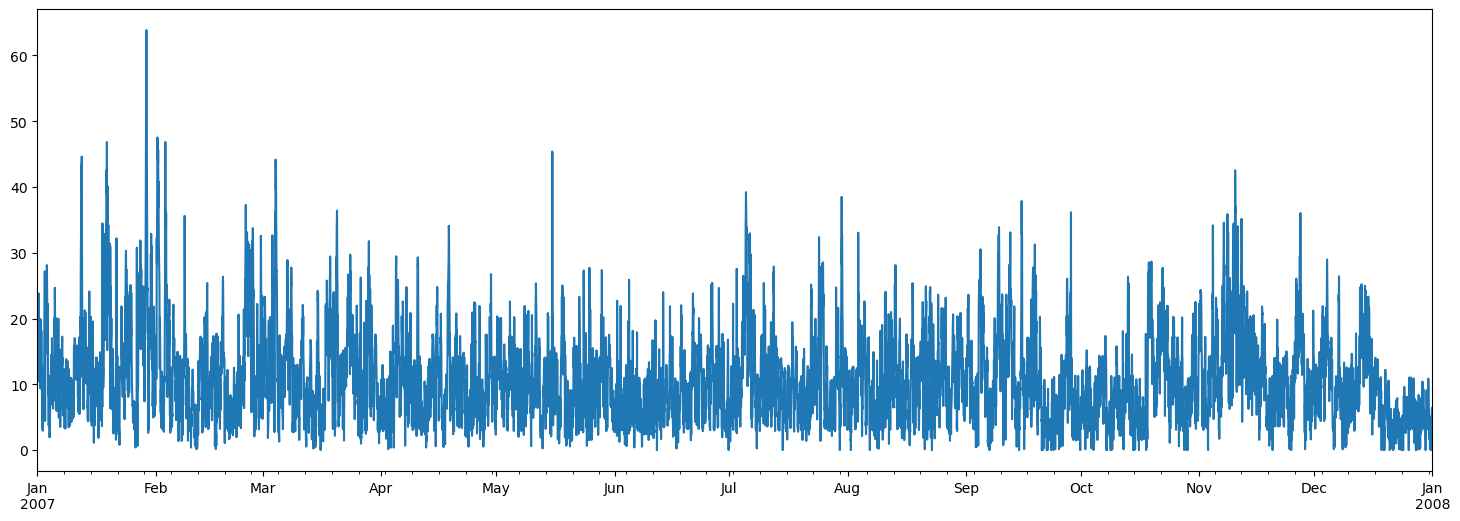

Variable "Wind_speed", year 2008:


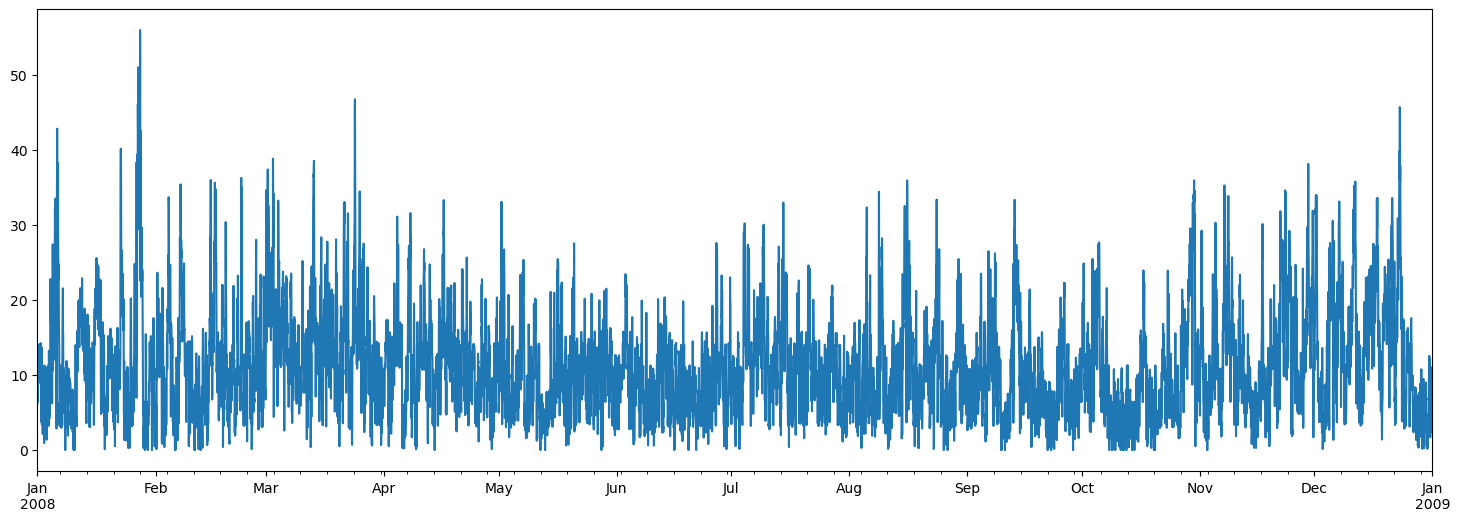

Variable "Wind_speed", year 2009:


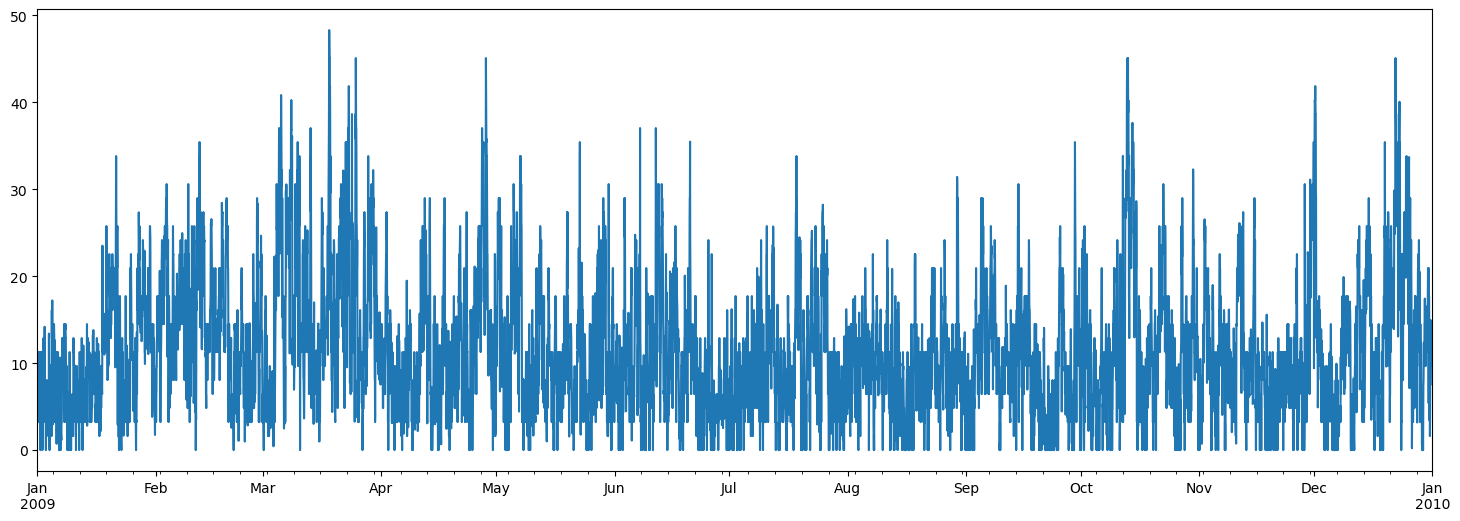

Variable "Wind_speed", year 2010:


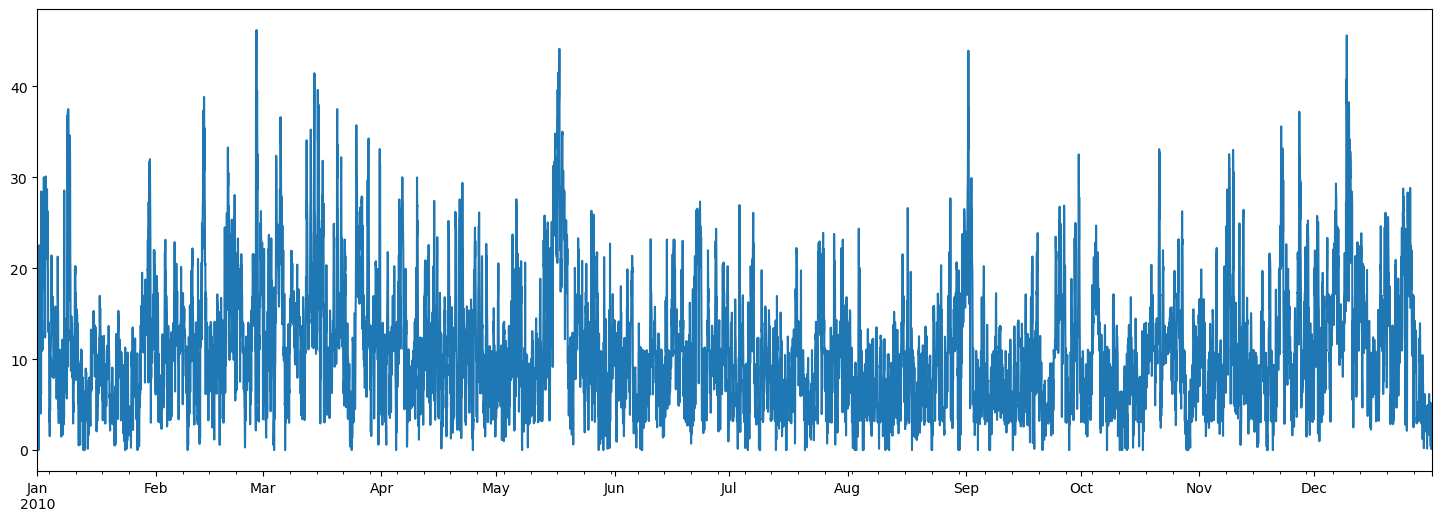


Variable "Wind_bearing":
------------------------

Variable "Wind_bearing", year 2006:


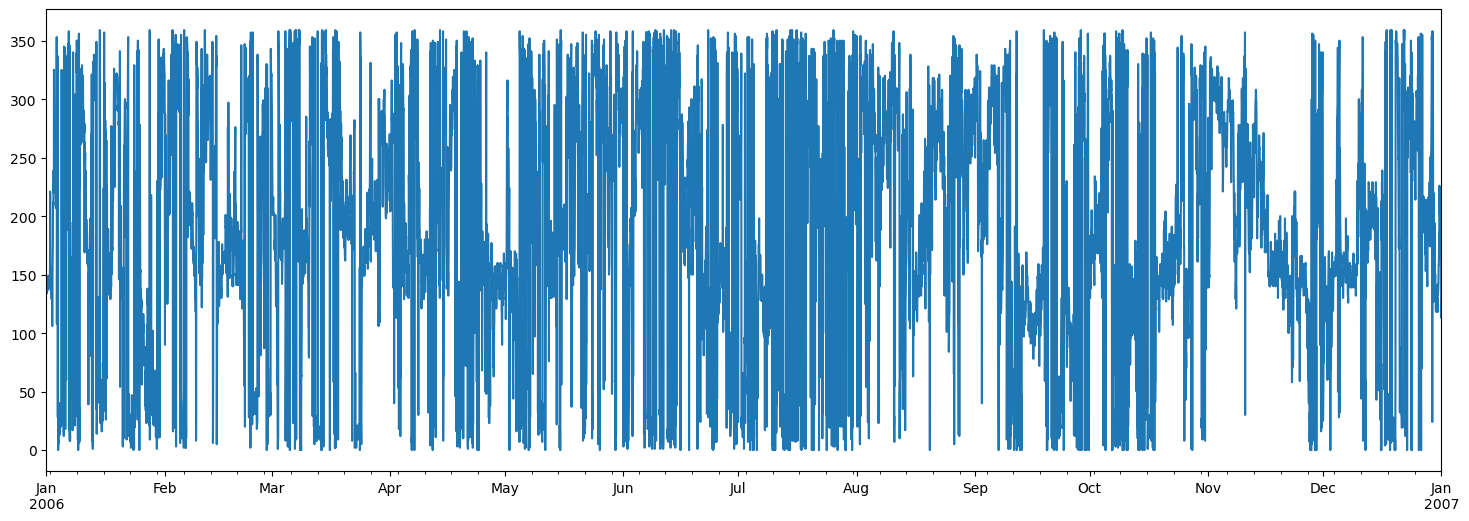

Variable "Wind_bearing", year 2007:


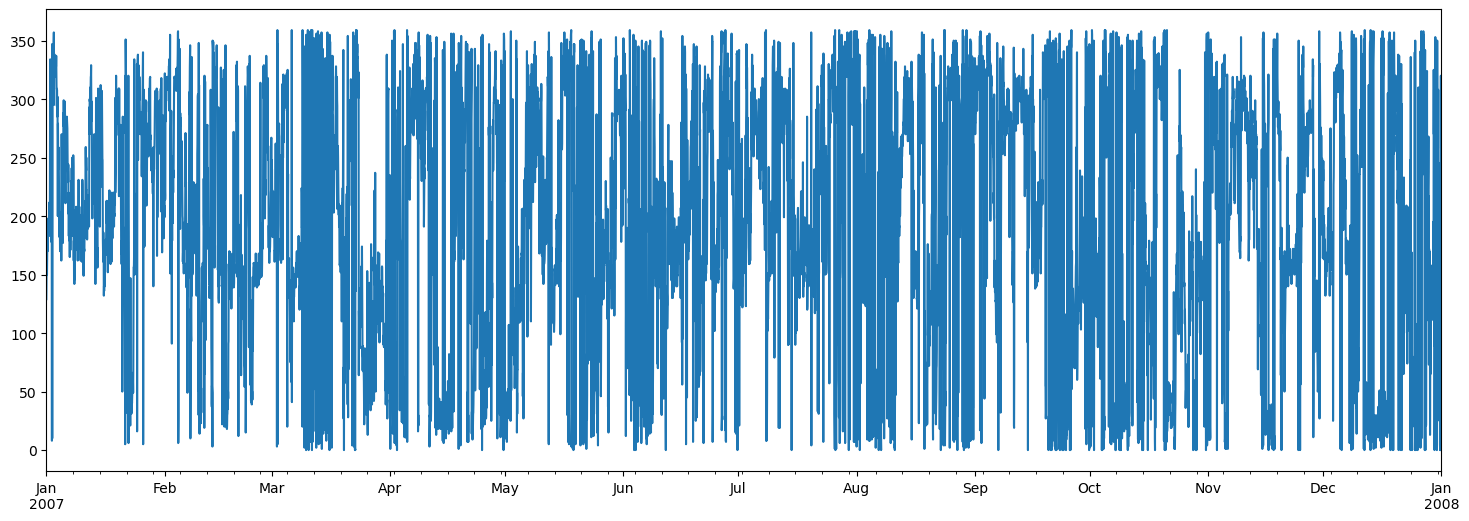

Variable "Wind_bearing", year 2008:


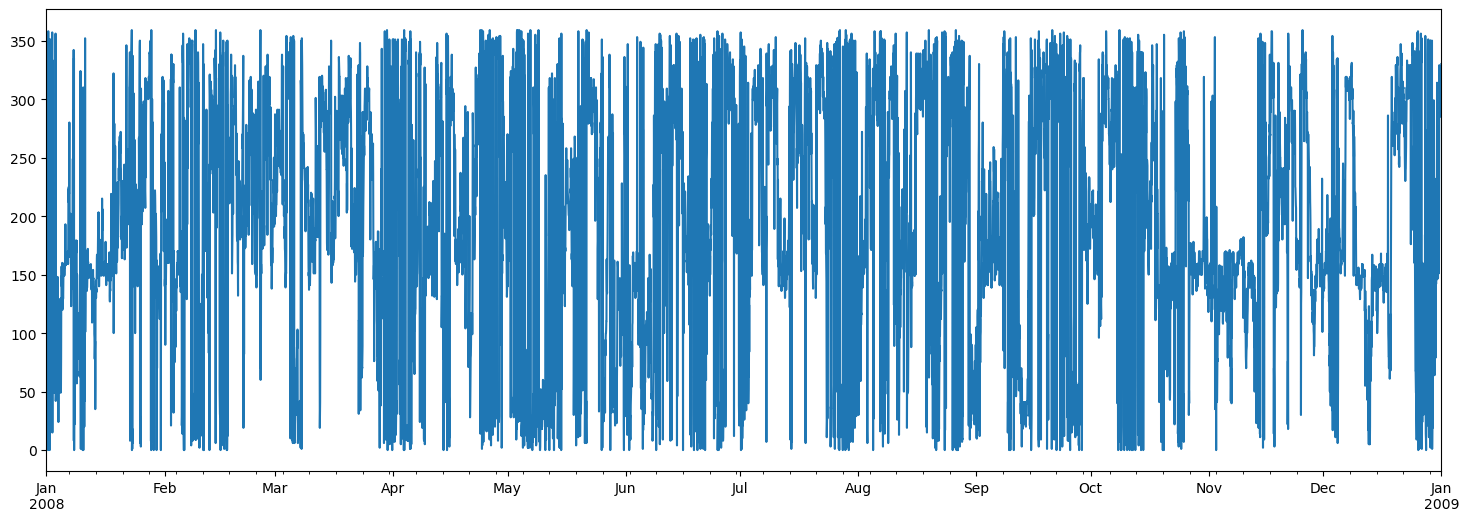

Variable "Wind_bearing", year 2009:


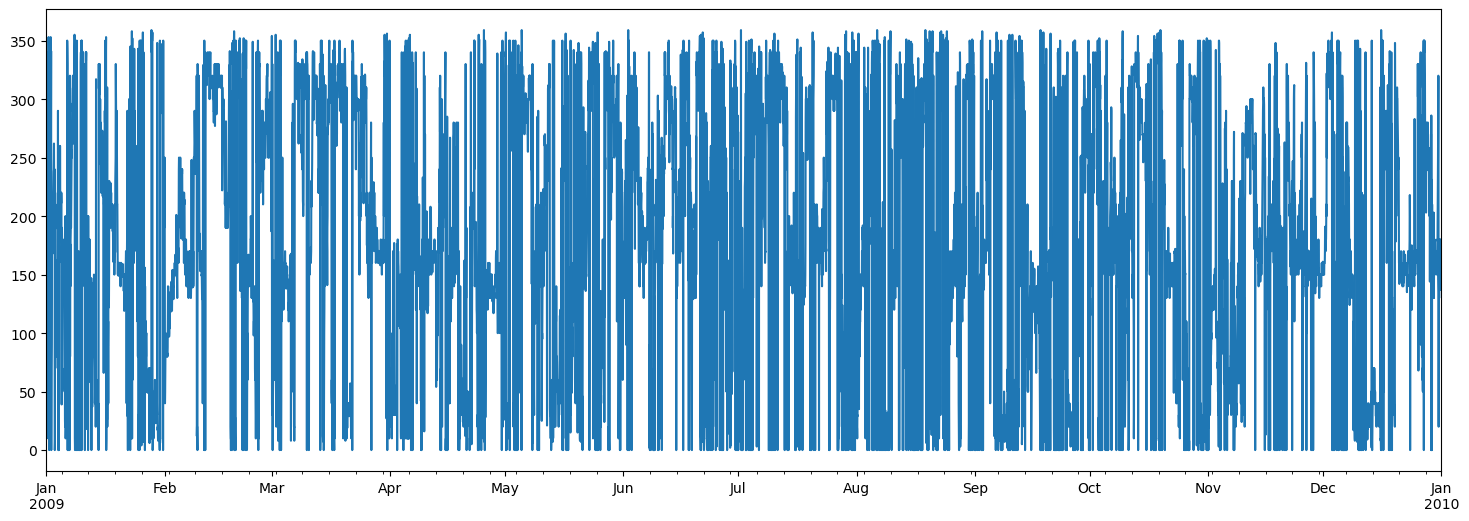

Variable "Wind_bearing", year 2010:


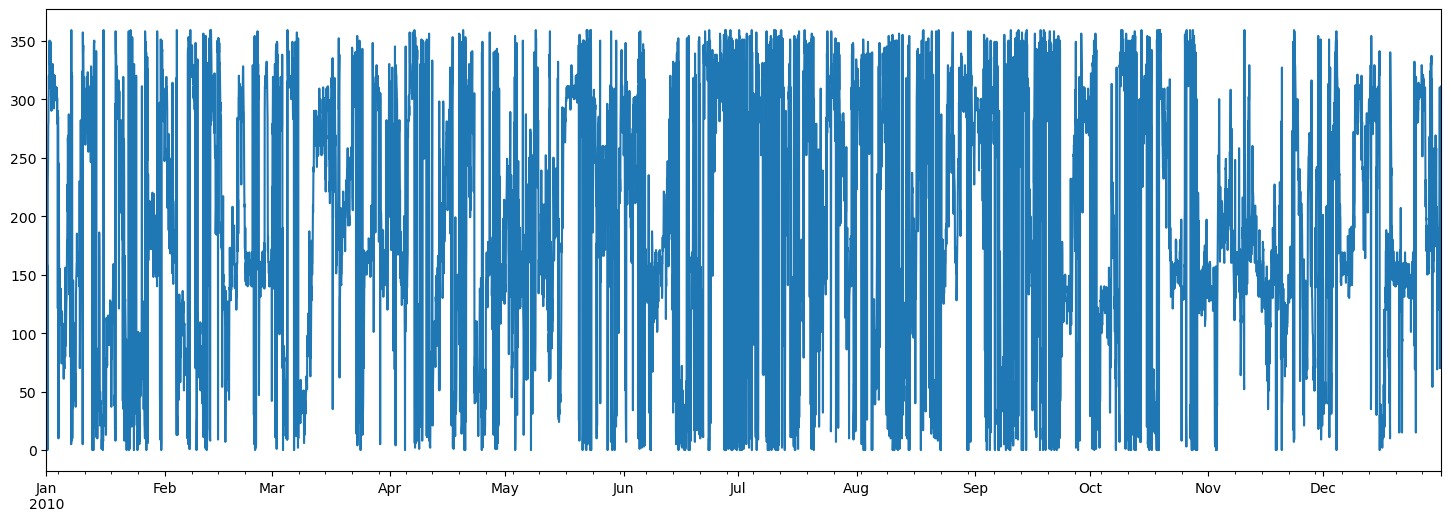


Variable "Visibility":
----------------------

Variable "Visibility", year 2006:


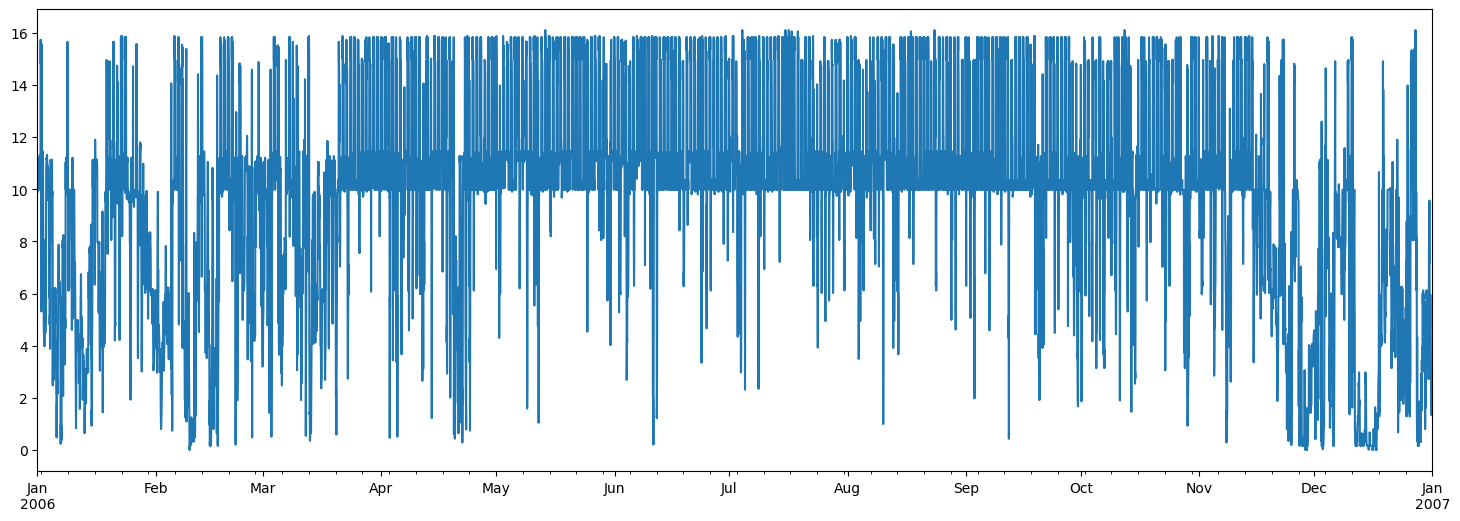

Variable "Visibility", year 2007:


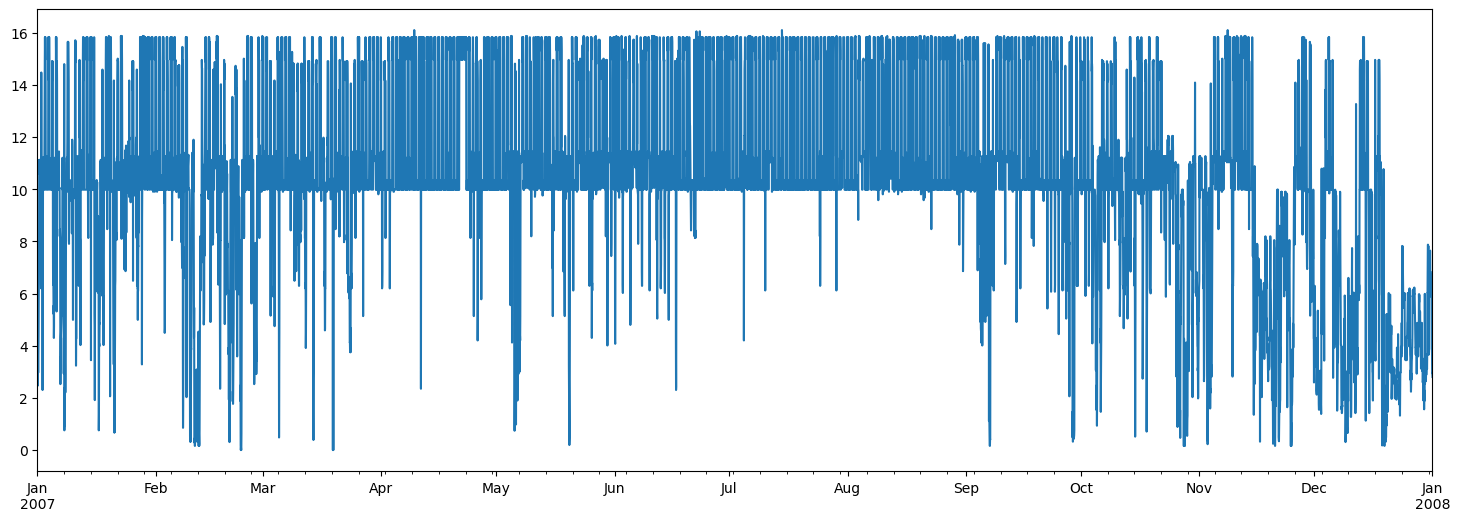

Variable "Visibility", year 2008:


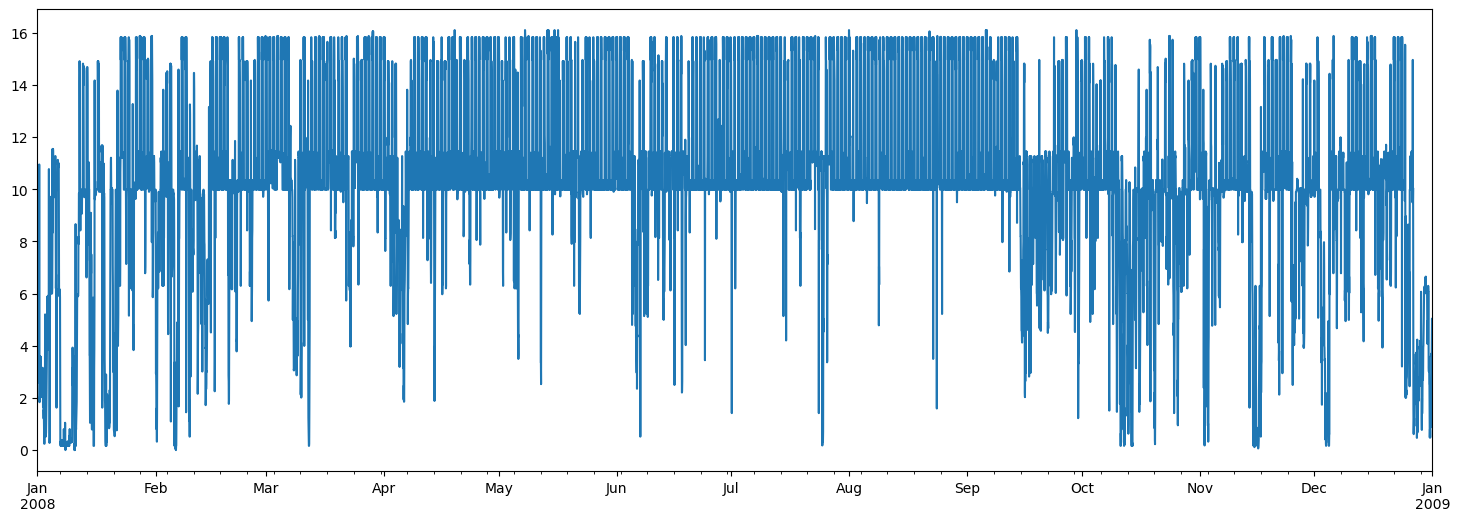

Variable "Visibility", year 2009:


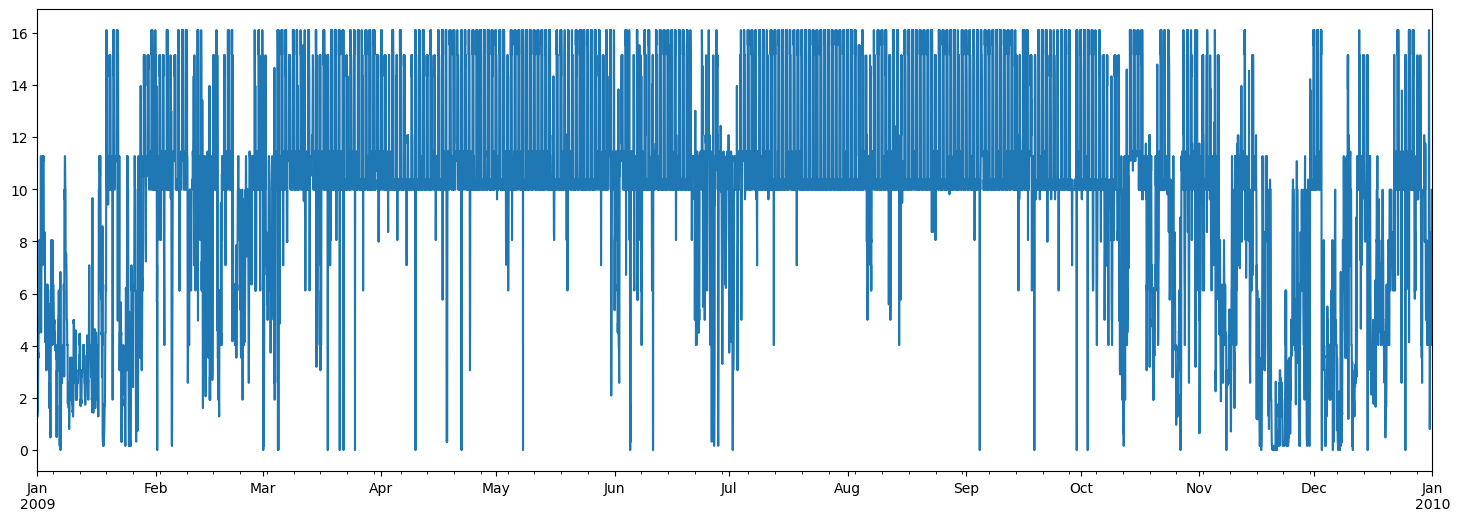

Variable "Visibility", year 2010:


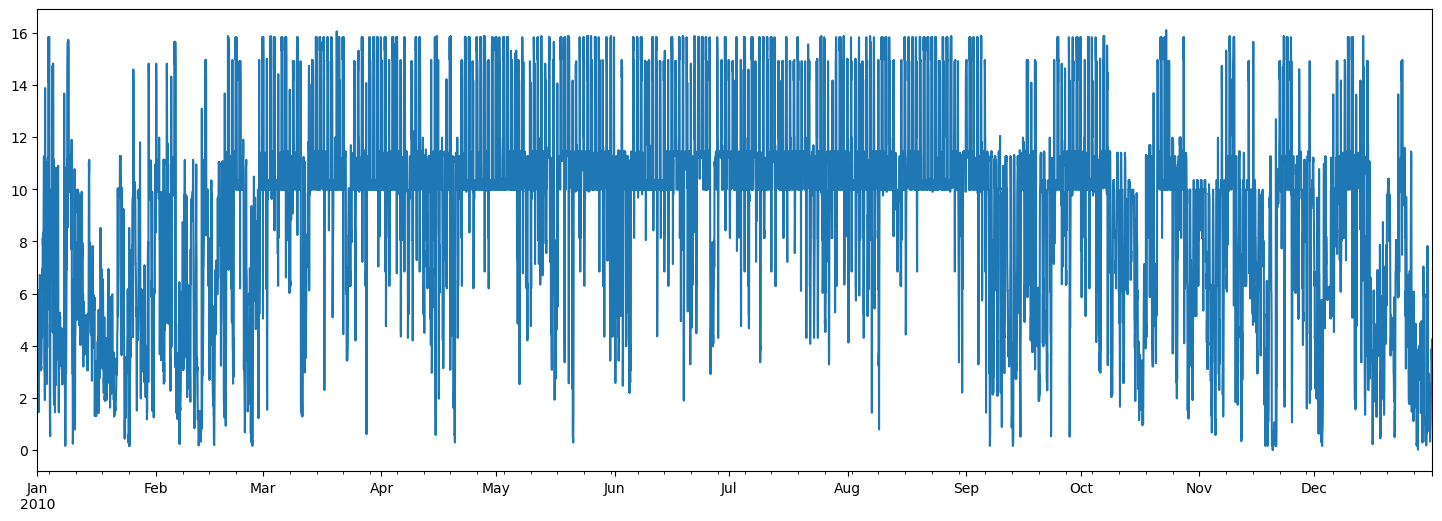


Variable "Pressure":
--------------------

Variable "Pressure", year 2006:


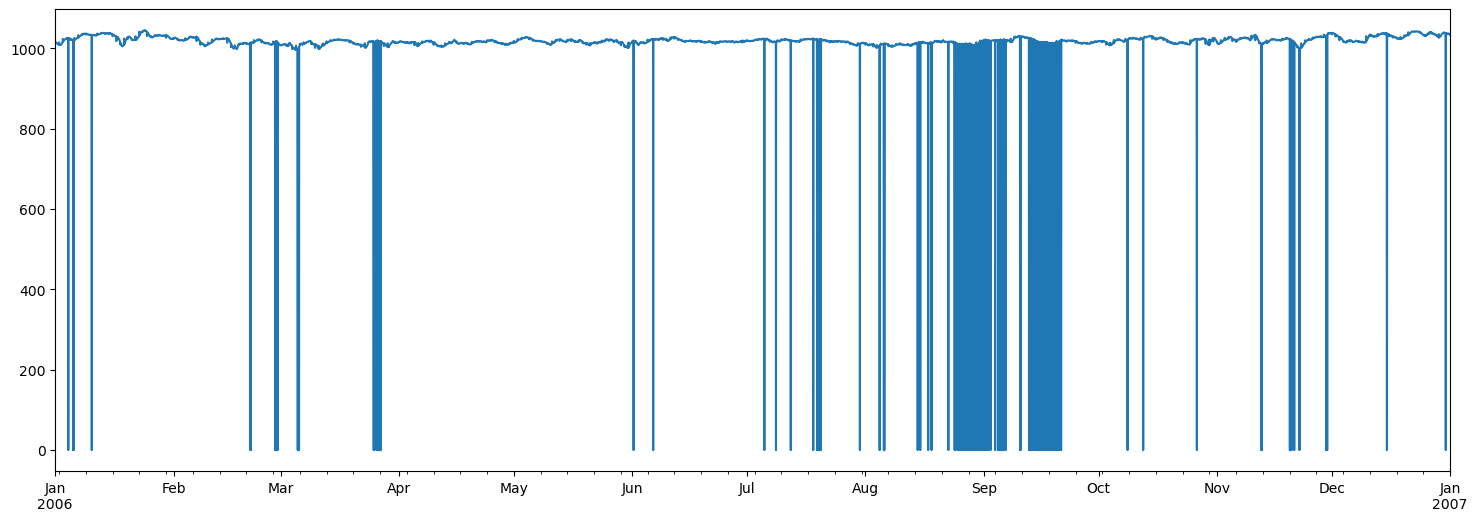

Variable "Pressure", year 2007:


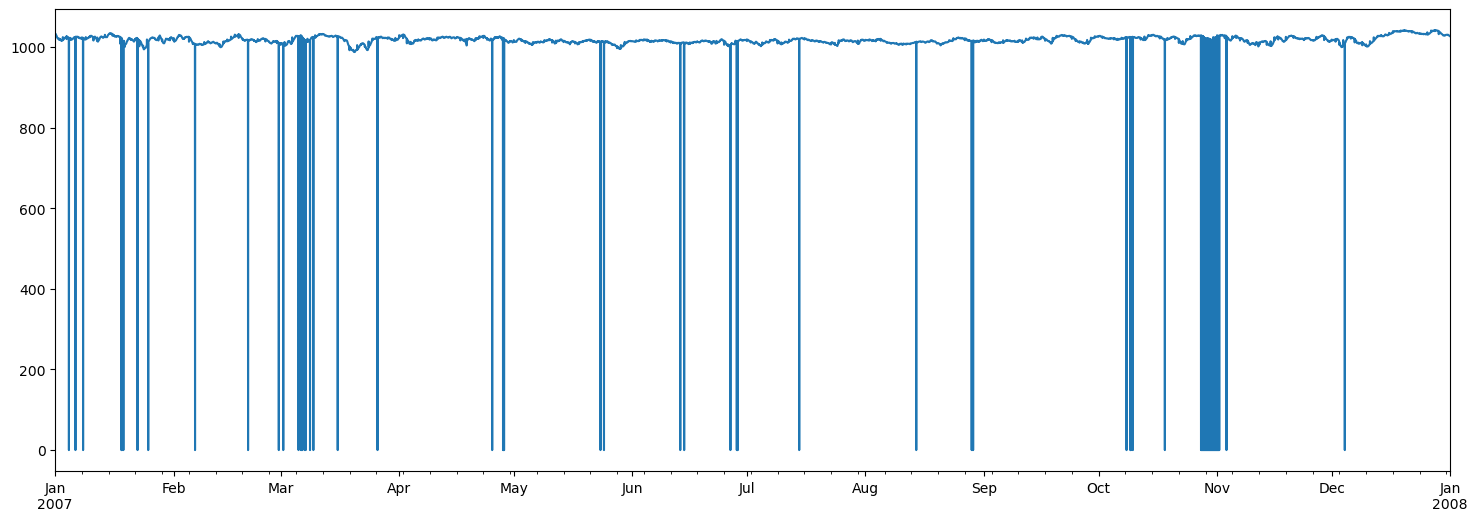

Variable "Pressure", year 2008:


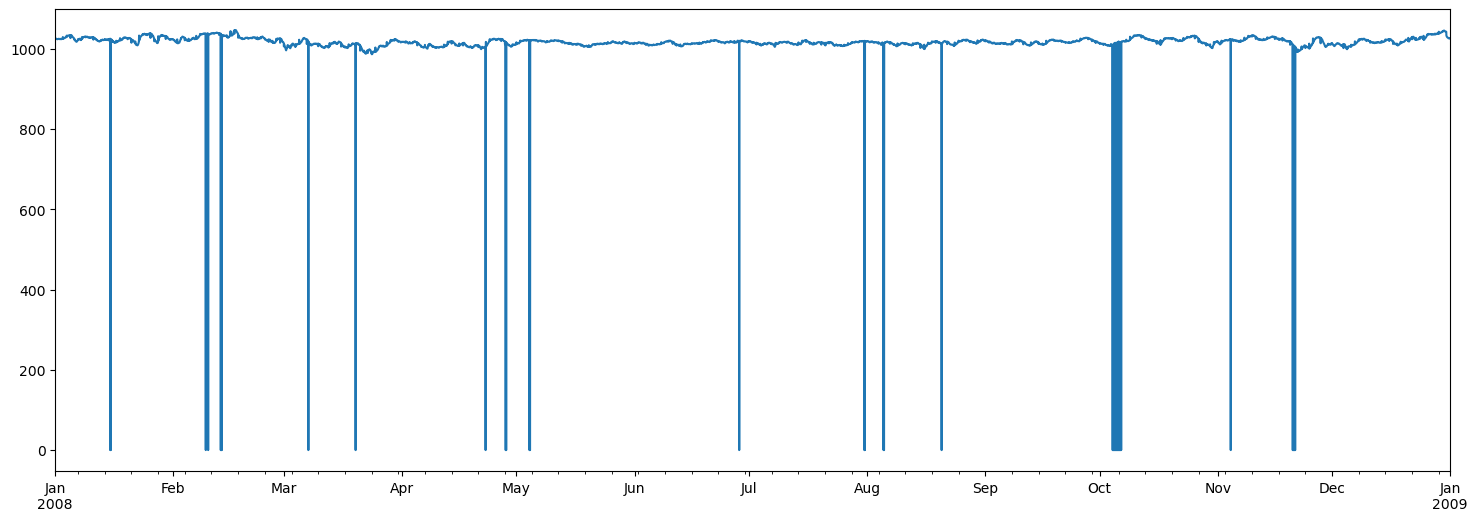

Variable "Pressure", year 2009:


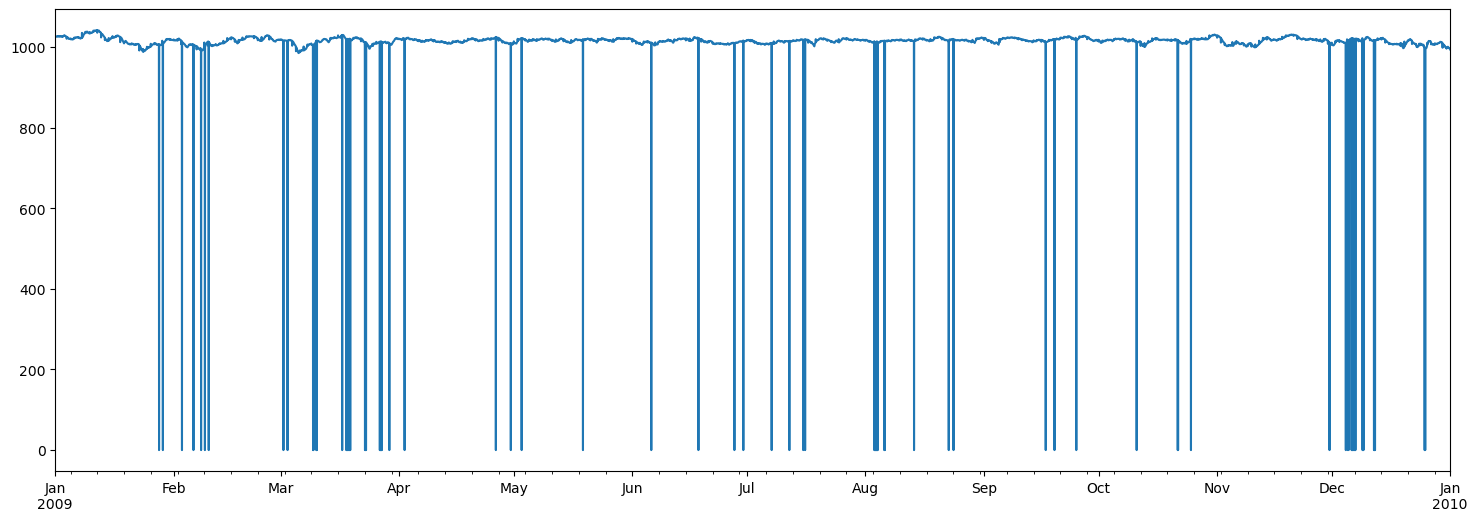

Variable "Pressure", year 2010:


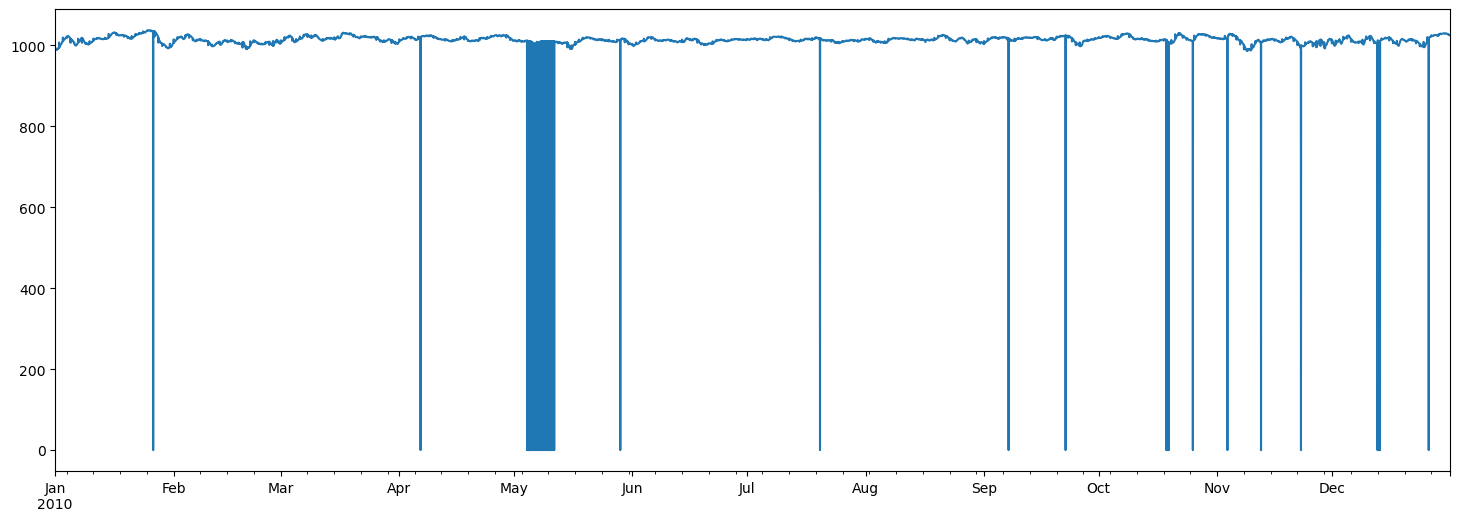

In [20]:
dispay_plots_of_numerical_variables_per_year(df, numerical_variables)

# 3. Detect the outliers of the numerical variables using the Tukey method

In [21]:
outlier_series_dictionary = detect_the_outliers_of_numerical_variables_using_Tukey_method(df, numerical_variables, whis=2)
display_outlier_series(outlier_series_dictionary)

Timestamps of the outliers of "Temperature":

Series([], Freq: H, Name: Temperature, dtype: float64) 

Timestamps of the outliers of "Humidity":

2008-02-17 13:00:00+00:00    0.0
2009-01-25 10:00:00+00:00    0.0
2009-12-20 20:00:00+00:00    0.0
2009-12-20 22:00:00+00:00    0.0
2009-12-21 05:00:00+00:00    0.0
Name: Humidity, dtype: float64 

Timestamps of the outliers of "Wind_speed":

2006-01-22 16:00:00+00:00    33.2304
2006-01-22 18:00:00+00:00    33.4880
2006-01-22 21:00:00+00:00    32.6025
2006-01-22 23:00:00+00:00    31.5721
2006-03-04 04:00:00+00:00    38.7044
                              ...   
2010-12-10 03:00:00+00:00    38.0121
2010-12-10 08:00:00+00:00    34.1481
2010-12-10 09:00:00+00:00    32.8923
2010-12-10 11:00:00+00:00    32.8440
2010-12-10 12:00:00+00:00    31.7653
Name: Wind_speed, Length: 635, dtype: float64 

Timestamps of the outliers of "Wind_bearing":

Series([], Freq: H, Name: Wind_bearing, dtype: int64) 

Timestamps of the outliers of "Visibility":

2006-01-

# 4. Save the dictionary of the outlier series of the numerical variables

In [22]:
with open(artifacts_dir / 'outlier_series_dict.pkl', 'wb') as f:
    pickle.dump(outlier_series_dictionary, f)